
### Project: Marketing Analysis
### Rauf Nugmanov, Pinki Sharma, Umiama Khurshid Ahmad

#***--------------------------Project Summary--------------------------------***


### **Motivation: What problem are you tackling, and what's the setting you're considering? What data are you working on? Did anything change from the proposal regarding data, objectives, and methods that you will apply?**


 The overall problem we are tackling is that many banks want to know what type of customers would want to avail a campaign offer so that it will make them understand what type of users they should invest time into. We have set a baseline to first analyze the data through explanatory analysis, by explaining the data we set to analyze the problem statement by performing different classifiers, experimenting different ways to improve performance of those classifiers which can help in the prediction the campaign offers. The initial dataset is the banking dataset with 41188 rows and 21 features. Most features were categorial hence we tried to transform the data and use dummy variables to get in depth of each categorical variable within. The categorical variables were as following: ***'job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'***


### ***Research questions: Which of the research questions have you tried to answer that you came up with during your proposal?***


Our main research question is: 
* **To predict whether a customer avails term deposit or not.**



 However, we did another sub research question in order to analyze the following research question: 
* **Can willingness to subscribe for term deposit projects be predicted by education variable, marital status, job and other variables.** 

As these variables were categorical variables we can only analyze these through EDA, we came to a conclusion through the analysis that variables like education, martial, status does impact the term deposit as we saw that professionals with admin and blue collar jobs are more inclined towards accepting the term deposit. Also, customers who are married are more interested in accepting the term deposit. By looking at education variables we can also see that customers with a higher educational degree are more educated in terms of understanding the policies and terms to accept the term deposit. Furthermore, client whose job profession is admin have subcribed more to the bank deposit term. From all these analysis we came to a conclusion that material status and education has an impact towards term deposit. 
 
* **Average portrait of the person who is willing to subscribe to a term deposit.**

From the analysis we have predicted that young people are Millennials that who are currently between 25 and 40 years old are tending towards acceptance of term deposits. These people are highly educated and married. They are also those individuals who are doing high level jobs such as blue collar jobs. As a typical portrait of a person X who is inclined towards term deposit is someone with a highest education level and married witha a blue color job.
 


### ***Exploratory Data Analysis (EDA): What data visualizations have you applied? What are your findings in the data before applying any data mining technique? At this stage sufficient EDA should have been done.***

We  created a correlation table and heat map of numerical features to see the highly correlated features with threshold 0.9. There are 3 variables which are largely correlated to each other, we are assuming a threshold as 0.9, the value greater than this threshold is assumed to be highly correlated. For instance, euribor3m, nr.employed, emp.var.rate all have correlation values greater than threshold value(0.9).
We observe our dataset is not balanced looking at the target variable distribution graph.

 Distribution plot for age column to see which age group have subscribed the term deposit, we found 25-50 years age group are more interested. We created lm plots to see if the trend differed between target variable ‘y’ and marital status with respect to age and campaign variables. Looking at the lmplot we observe clients who are married and whose age are between 25-45 years old are responsive toward term deposit.  We created histogram for ‘duration’, we observed higher the duration of call, client subscribed more to term deposit.

We created join plot to see trend between age and campaign, we found 25-40 age group people were contacted multiple times for the campaign.

From statistical summary we analyzed that the bank was targeting clients with a minimum age of 17 years old. 

We created a count plot for categorical features with respect to target variable ’y’. We observe a client whose job profession is admin has subscribed more to the bank deposit term. Married people are more interested toward term deposit subscription. People who have university degrees are showing more interest and may-august are the month where clients were contacted more by banks.Cellular phone is used more to communicate with the clients. The people with university degree education are the most subscribers to term deposit among all types of educated people.




### ***Machine Learning (ML): Which ML techniques have you tried? What others will you apply?***

We tried 7 different classifiers which are randomforest, decision tree, logistic regression, gaussian naive bayes, k_nearestneighbors, gradient boosting and support vector. Further we performed hyper-parameter tuning and PCA analysis over these classifiers in order to analyze performance between the classifiers. We also used a feature importance method for tree-based models( Decision tree and random forest). Decision tree classifiers tend to overfit very easily by memorizing the training data so to reduce the overfitting we chose random forest. 

### **Experiment results: Show the ML experiments that you've run, the outcomes, and any error analysis that you've done.**

Comparision table that of all default classifier 

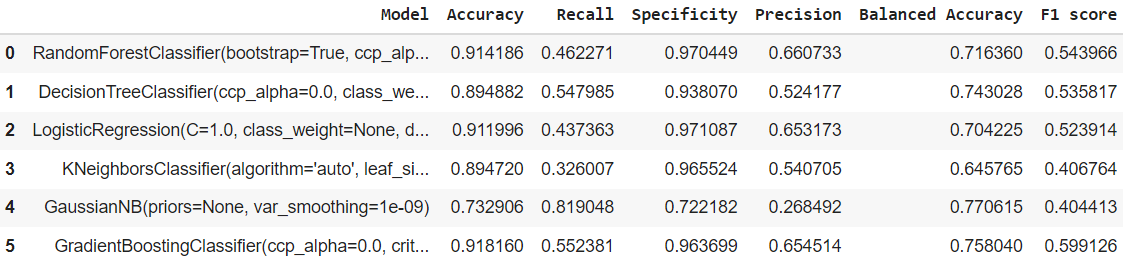

Comparision table after doing hyperparameter tunning for all classifier 

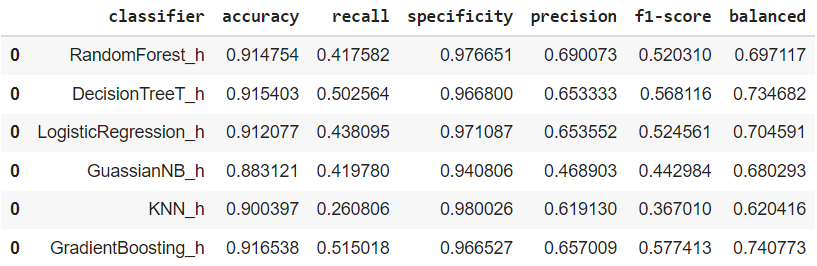

Comparision table after using PCA for all classifier

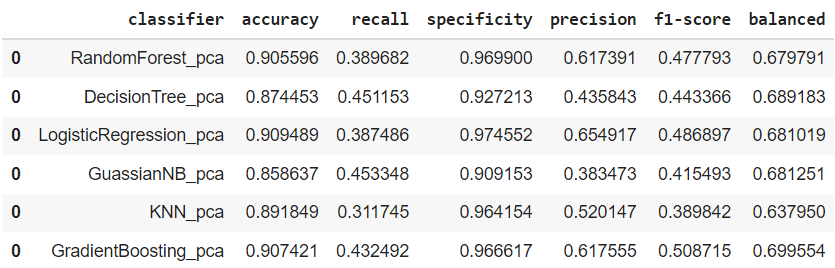

Comparision table after balancing the minority class(balance dataset)

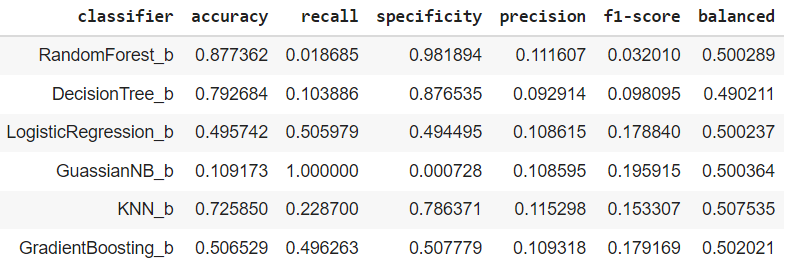

We ran the following classifiers intialled mentioned in the project proposal but we dropped the SVC classifier as it was taking a long time to execute and it was creating a burden on memory. Also for the huge number of dummy variables, svc is not applicable. In SVC we tried creating a model by removing categorical features and workin on numerical only but still it did not work.

### ***Next steps: Given your preliminary results, what are the next steps that you're considering?***

We are thinking of grouping the age variable into different intervals of age groups and checking which interval age group subscribes more to term deposit.
 We will try to create a realistic model dropping the column 'duration' because when duration 0 there is no chance the client will subscribe to the term deposit. We can say the duration attribute is highly correlated to the target variable.

Other possible ways to improve the classification performance:
Hyperparameter Tuning. This will affect the model's parameters during the training phase. So it is very essential to set the right hyperparameters. It is completely trial and error which can give you best accuracy by a few percentage points.

Treating Outliers as we do not have any missing values. Outliers can be biased on the accuracy of the model. Very important treatment.


# ***---------------------- Marketing Banking Dataset Analysis ---------------------------***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#### Get the Data
#### Use pandas to read in the datasets as a dataframe.

In [ ]:
path = "sample_data/bank-additional-full.csv"                    

In [ ]:
df = pd.read_csv(path,sep=";") 

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

The dataset has 41188 rows and 21 columns.

#### Checking the data and investigating the column types. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dataset has 10 categorical data and 10 numeric data and target variable(y) is shown as object datatype which is boolean variable (where yes means subcribed and no means not subcribed).

#### Checking for any missing values

In [ ]:
# To check if we have any null values using below code for better clarification.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We can see that our dataset is clean and has no missing values.

In [ ]:
# Finding the unique values of y
df['y'].unique()

array(['no', 'yes'], dtype=object)

The unique values for 'y' is yes and no.

In [ ]:
# how many people(client) have subscribed to a term deposit?    
df.y.value_counts() 

no     36548
yes     4640
Name: y, dtype: int64

The distribution of the target variables(y) is 36548-no and 4640-yes.

4640 number of people have subscribed to a term deposit.

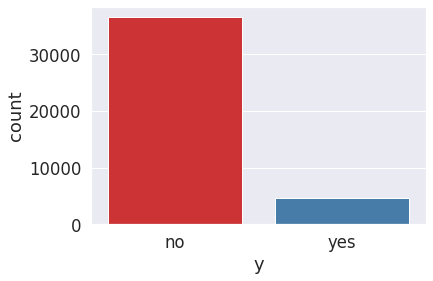

In [ ]:
sns.set(font_scale=1.5)
countplt=sns.countplot(x='y', data=df, palette ='Set1')
plt.show()

we can see our dataset is not balanced looking at the target variable. The number of negative class('no') is almost 8 times the positive class('yes').

#### Checking for duplicate values

In [ ]:
# checking for duplicate values
df.duplicated().sum()

12

From above we can see there are 12 duplicate rows in our datasets, we are dropping the duplicate rows from our dataset.

In [ ]:
# Removing Duplicate Values
df = df.drop_duplicates()

In [ ]:
# how many people(client) have subscribed to a term deposit?    
df.y.value_counts() 

no     36537
yes     4639
Name: y, dtype: int64

#### Finding the number unknown label in each of the categorical features.

In [ ]:
print("# Missing value 'job' variable: {0}".format(len(df.loc[df['job'] == "unknown"])))
print("# Missing value 'marital' variable: {0}".format(len(df.loc[df['marital'] == "unknown"])))
print("# Missing value 'education' variable: {0}".format(len(df.loc[df['education'] == "unknown"])))
print("# Missing value 'default' variable: {0}".format(len(df.loc[df['default'] == "unknown"])))
print("# Missing value 'housing' variable: {0}".format(len(df.loc[df['housing'] == "unknown"])))
print("# Missing value 'loan' variable: {0}".format(len(df.loc[df['loan'] == "unknown"])))
print("# Missing value 'contact' variable: {0}".format(len(df.loc[df['contact'] == "unknown"])))
print("# Missing value 'month' variable: {0}".format(len(df.loc[df['month'] == "unknown"])))
print("# Missing value 'day_of_week' variable: {0}".format(len(df.loc[df['day_of_week'] == "unknown"])))
print("# Missing value 'poutcome' variable: {0}".format(len(df.loc[df['poutcome'] == "unknown"])))

# Missing value 'job' variable: 330
# Missing value 'marital' variable: 80
# Missing value 'education' variable: 1730
# Missing value 'default' variable: 8596
# Missing value 'housing' variable: 990
# Missing value 'loan' variable: 990
# Missing value 'contact' variable: 0
# Missing value 'month' variable: 0
# Missing value 'day_of_week' variable: 0
# Missing value 'poutcome' variable: 0


### Dealing with the variable that label as unknown (missing data)

Maritial status have 80 unknown value or missing value which is not making sense as maritial status is always label as single, married or divorced. We will remove the unknown label of maritial status from our dataset.

In [ ]:
df[df['marital'] == "unknown"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,366,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,253,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,unknown,basic.4y,no,no,no,telephone,may,tue,673,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,155,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,617,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,164,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,157,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,977,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,173,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [ ]:
# dropping the martial status which is unknown from our dataframe
df.drop(df[df['marital'] == "unknown"].index, inplace=True)

In [ ]:
df.shape

(41096, 21)

'Default' attribute has very few 'yes' status, only 3 clients; however, 'unknown' status is very large which is 8596 in total. It is difficult to use imputation method and dropping the specific rows method because the proportion of yes response is too low. Thus, we will keep 'unknown' as a category.

In [ ]:
df[df['default'] == "yes"].shape

(3, 21)

Education and job have unknown label as one of the category, instead of dropping the rows / columns, we will use mode as a simpleimputer to replace the unknown label.

In [ ]:
df.education.value_counts() 

university.degree      12133
high.school             9498
basic.9y                6037
professional.course     5234
basic.4y                4170
basic.6y                2285
unknown                 1721
illiterate                18
Name: education, dtype: int64

In [ ]:
df.job.value_counts() 

admin.           10405
blue-collar       9239
technician        6727
services          3961
management        2921
retired           1713
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
unknown            321
Name: job, dtype: int64

#### Checking the statistical summary of numeric features. 

In [ ]:
df.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000
mean,40.023311,258.209899,2.566673,962.514186,0.172815,0.082512,93.575923,-40.502246,3.621894,5167.053638
std,10.420089,259.245306,2.767906,186.816397,0.494837,1.570683,0.578727,4.627021,1.734266,72.255185
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Minmum age of target customer is 17 indicates that this campaign is focused towards adults.

### **Exploratory Data Analysis**

#### Checking for outliers in dataset

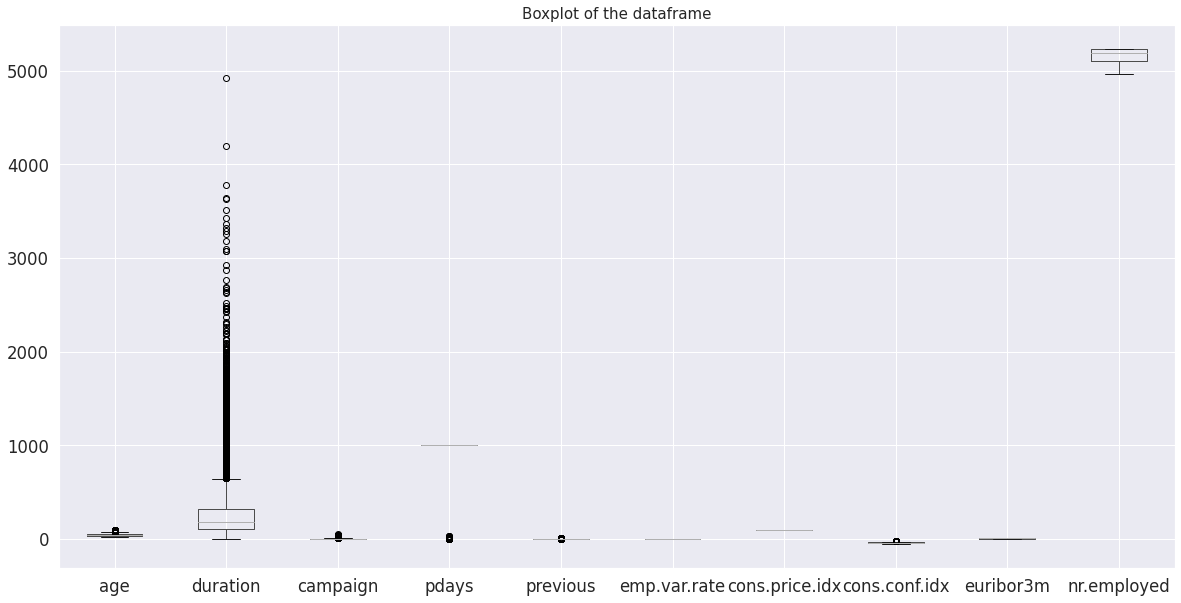

In [ ]:
# checking for outliers in dataset
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

From above box plot we can see Outliers are mainly found in duration variable. It is measured in seconds not in minutes, so we are seeing many outliers only in duration features. However, other features outliers is not clear in above figure. There  are some outliers in age and campaign variable. 

We are plotting individual boxplot for age, campaign and duration to see the difference.

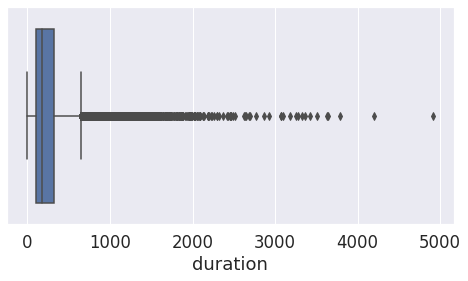

In [ ]:
# looking inside duration variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

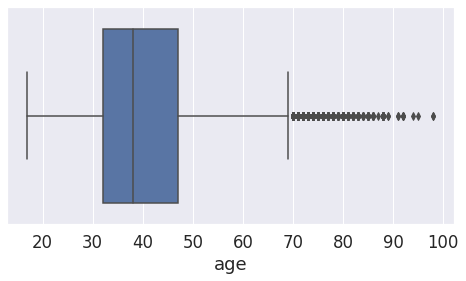

In [ ]:
# looking inside age variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.show()

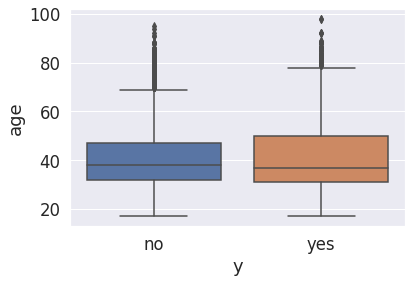

In [ ]:
sns.boxplot(x = 'y', y = 'age', data = df)

We cannot see much difference in age of people who subscribed term deposit and people who do not. 

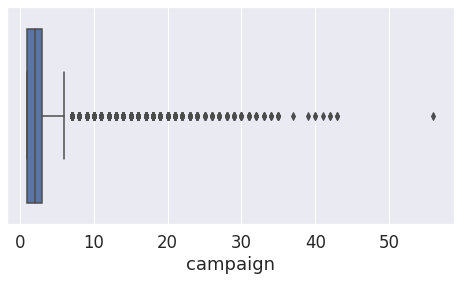

In [ ]:
# looking inside campaign variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['campaign'])
plt.show()

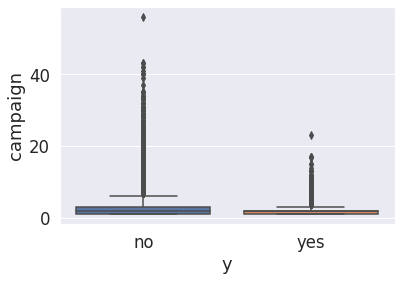

In [ ]:
sns.boxplot(x = 'y', y = 'campaign', data = df)

In [ ]:
Q1_d = df['duration'].quantile(.25)
Q3_d = df['duration'].quantile(.75)
Q1_a = df['age'].quantile(.25)
Q3_a = df['age'].quantile(.75)
Q1_c = df['campaign'].quantile(.25)
Q3_c = df['campaign'].quantile(.75)

In [ ]:
IQR_d = Q3_d - Q1_d
IQR_a = Q3_a - Q1_a
IQR_c = Q3_c - Q1_c

In [ ]:
print(IQR_d)
print(IQR_a)
print(IQR_c)

217.0
15.0
2.0


In [ ]:
lower_d = Q1_d - 1.5 * IQR_d
upper_d = Q3_d + 1.5 * IQR_d
lower_a = Q1_a - 1.5 * IQR_a
upper_a = Q3_a + 1.5 * IQR_a
lower_c = Q1_c - 1.5 * IQR_d
upper_c = Q3_c + 1.5 * IQR_d

In [ ]:
print(lower_d,upper_d)
print(lower_a,upper_a)
print(lower_c,upper_c)

-223.5 644.5
9.5 69.5
-324.5 328.5


Duration <- Above 644.5 second is outliers for duration

Age <- Above 69.5 years is outliers 

campaign <- above 328.5 is outliers

In [ ]:
# new dataframe created after removing outlier that exist outside the interval assign
df_out = df[df['duration'] >= lower_d] 
df_out= df[df['duration'] <= upper_d] 

In [ ]:
# new dataframe created after removing outlier that exist outside the interval assign
df_out = df[df['age'] >= lower_a] 
df_out= df[df['age'] <= upper_a] 

In [ ]:
# new dataframe created after removing outlier that exist outside the interval assign
df_out = df[df['campaign'] >= lower_c] 
df_out= df[df['campaign'] <= upper_c] 

In Future we can anlaysis this part:
We can dropped the duration variable as the value of the variable will only be known at the end of the call. In order to make the prediction model more realistic.

Also drop the outliers from age and campaign column

In [ ]:
df_out.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000,41096.000000
mean,40.023311,258.209899,2.566673,962.514186,0.172815,0.082512,93.575923,-40.502246,3.621894,5167.053638
std,10.420089,259.245306,2.767906,186.816397,0.494837,1.570683,0.578727,4.627021,1.734266,72.255185
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Correlation table and Heat map of numerical features

In [ ]:
# Calculating correlation
corr_matrix = df.corr()
print(corr_matrix)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.001414  0.004117 -0.035040  0.024821   
duration       -0.001414  1.000000 -0.071767 -0.047526  0.020336   
campaign        0.004117 -0.071767  1.000000  0.052477 -0.079105   
pdays          -0.035040 -0.047526  0.052477  1.000000 -0.587662   
previous        0.024821  0.020336 -0.079105 -0.587662  1.000000   
emp.var.rate   -0.000642 -0.027923  0.150454  0.271068 -0.420431   
cons.price.idx  0.000665  0.005598  0.127120  0.078883 -0.202701   
cons.conf.idx   0.129279 -0.008223 -0.013610 -0.091437 -0.051025   
euribor3m       0.010417 -0.032824  0.134818  0.296796 -0.454390   
nr.employed    -0.018144 -0.044734  0.143812  0.372446 -0.501320   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000642        0.000665       0.129279   0.010417   
duration           -0.027923        0.005598      -0.008223  -0.032824   
campaign            0.150454 

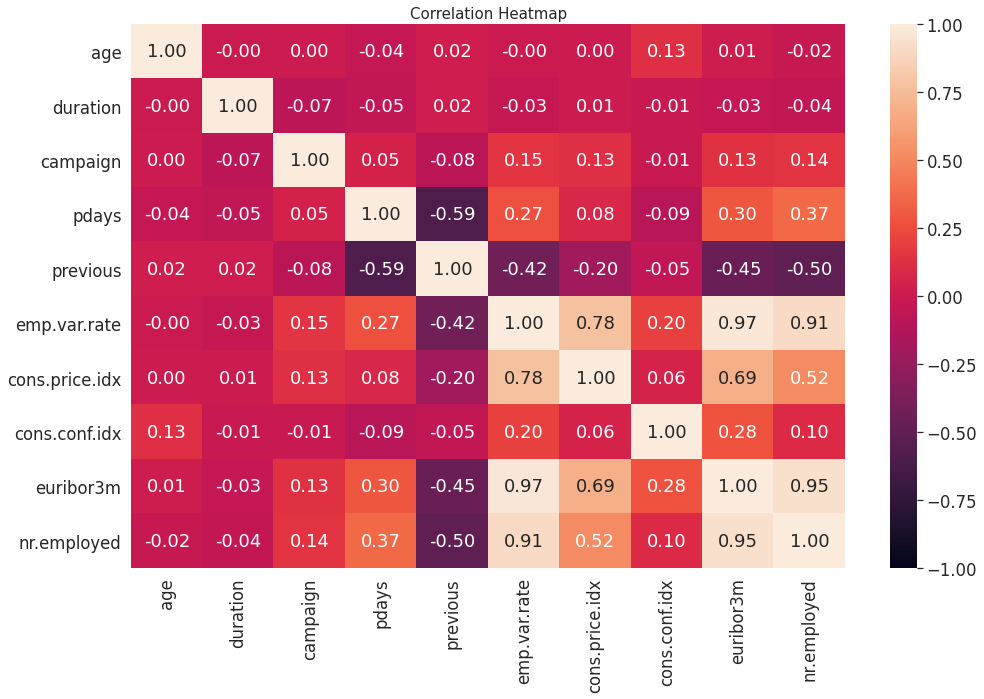

In [ ]:
# Creating correlation heat map.
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1,fmt='.2f')
plt.title("Correlation Heatmap", fontsize = 15)
plt.show()

From the above heatmap, we can see that few variables in the dataset are highly correlated.

We see from above that any lightier shade color box except the diagnol shows high positive correlation. We see from above that any darker color box shows high negative correlation.

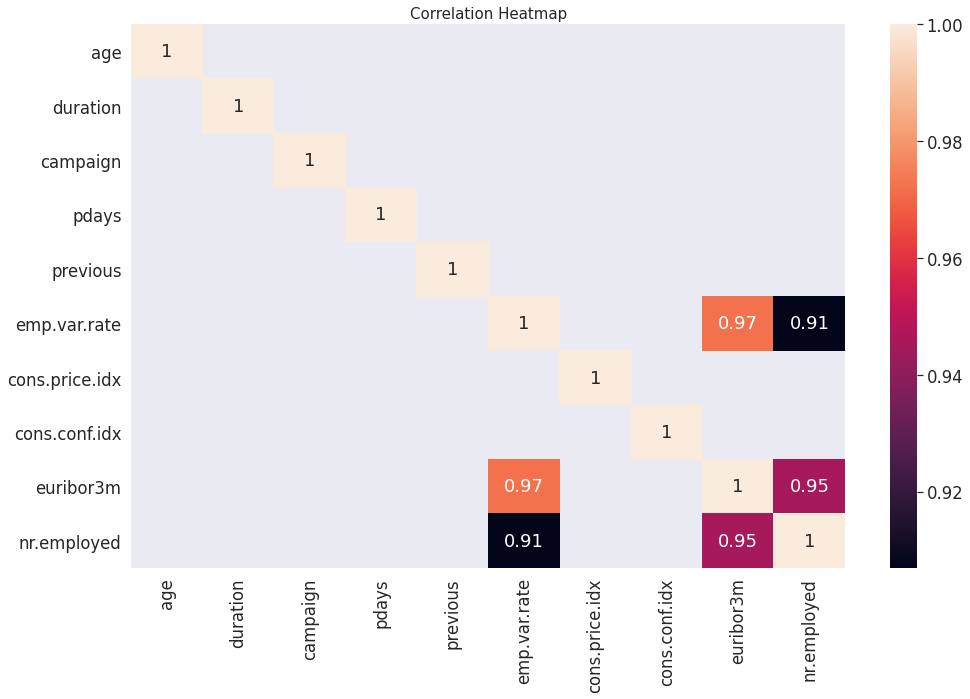

In [ ]:
# plotting the heatmap of only highly correlated varibles with threshold value 0.9
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix[corr_matrix > 0.9], annot=True)
plt.title("Correlation Heatmap",  fontsize = 15)
plt.show()

There are 3 variables which are largely correlated to each other, we are assuming a threshold as 0.9, the value greater then this threshold is assumed to be highly correlated. For instance, euribor3m, nr.employed, emp.var.rate all have correlation values greater than threshold value(0.9).

In [ ]:
# changing yes to 1 and no to 0
df['y'] = (df['y']=='yes').astype(int) 

In [ ]:
df.y.value_counts() 

0    36469
1     4627
Name: y, dtype: int64

#### Distribution plot for age column to see which age group have subscribe the term deposit 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


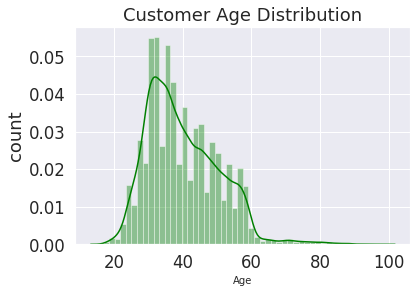

In [ ]:
sns.distplot(df['age'], color = 'green')
plt.title('Customer Age Distribution', fontsize = 18)
plt.xlabel('Age', fontsize = 10)
plt.ylabel('count')
plt.show()

Between age 25 and 45 years old people have subscribed the term deposit. 

Text(0.5, 0, 'age')

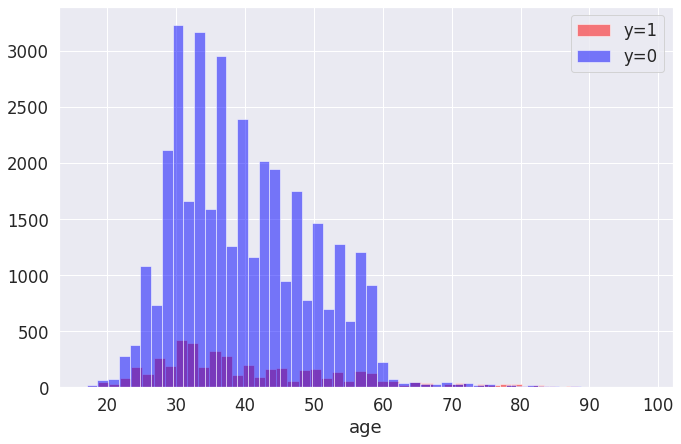

In [ ]:
plt.figure(figsize=(11,7))
df[df['y']==1]['age'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=1')
df[df['y']==0]['age'].hist(alpha = 0.5, color = 'blue', bins= 50, label='y=0')
plt.legend()
plt.xlabel('age')

Text(0.5, 0, 'campaign')

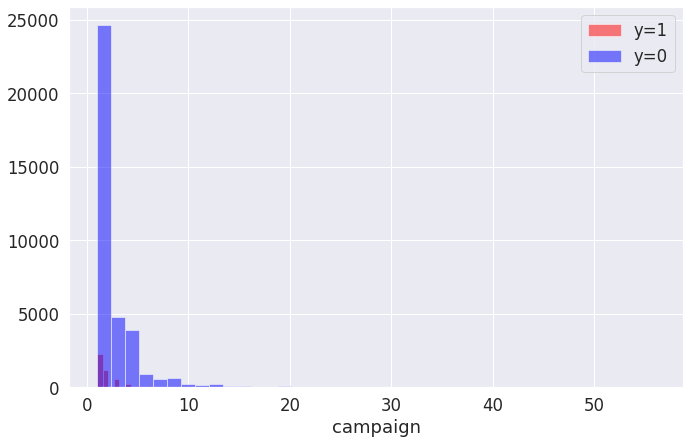

In [ ]:
plt.figure(figsize=(11,7))
df[df['y']==1]['campaign'].hist(alpha = 0.5, color = 'red', bins= 40, label='y=1')
df[df['y']==0]['campaign'].hist(alpha =0.5, color = 'blue', bins= 40, label='y=0')
plt.legend()
plt.xlabel('campaign')

Text(0.5, 0, 'duration')

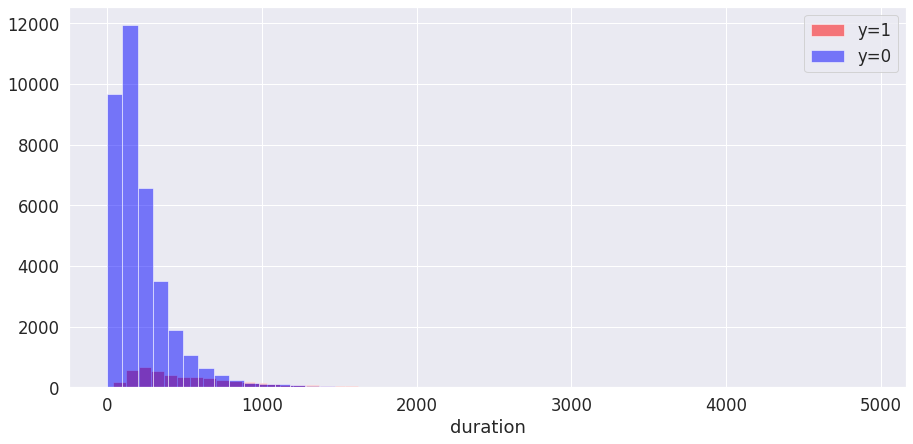

In [ ]:
plt.figure(figsize=(15,7))
df[df['y']==1]['duration'].hist(alpha = 0.5, color = 'red', bins= 50, label='y=1')
df[df['y']==0]['duration'].hist(alpha = 0.5, color = 'blue', bins= 50, label='y=0')
plt.legend()
plt.xlabel('duration')

#### Seing the trend between age and campaign using jointplot

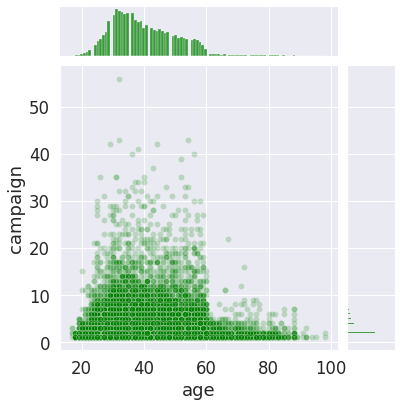

In [ ]:
sns.jointplot(x='age', y='campaign', data=df, color = 'green', alpha=0.2)

From above plot we can see campaign was targeted for adult between age 25-45.

#### Create the following lmplots to see if the trend differed between  y and martial status. 

<Figure size 792x504 with 0 Axes>

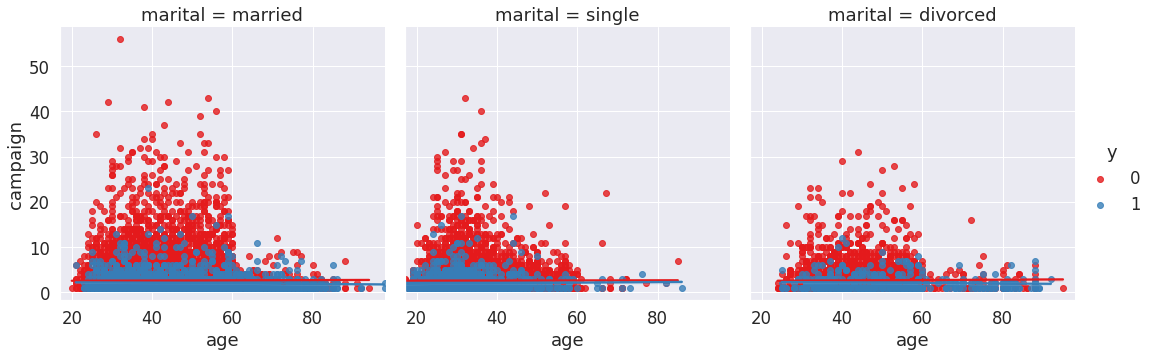

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='campaign',x='age',hue = 'y', data=df,col='marital',palette='Set1')

From above plot, we observe that clients who are married and whose age are in between 25-45 years old are responsive toward term deposit.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


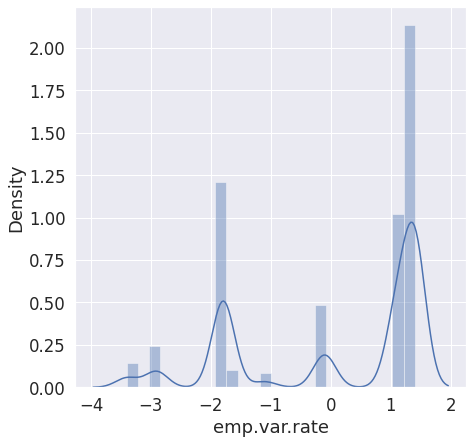

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['emp.var.rate'])

We can see there is a high employee variation rate which signifies that they have made the campaign when there were more people taken in because of the economic boom.

#### **Univariate Analysis of categorical features.**

#### Creating a countplot (bar plot showing counts using seaborn) that shows the counts of term deposit by job, martial status, education, default, so on for all categorical variables with the color hue defined by y

In [ ]:
cat_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

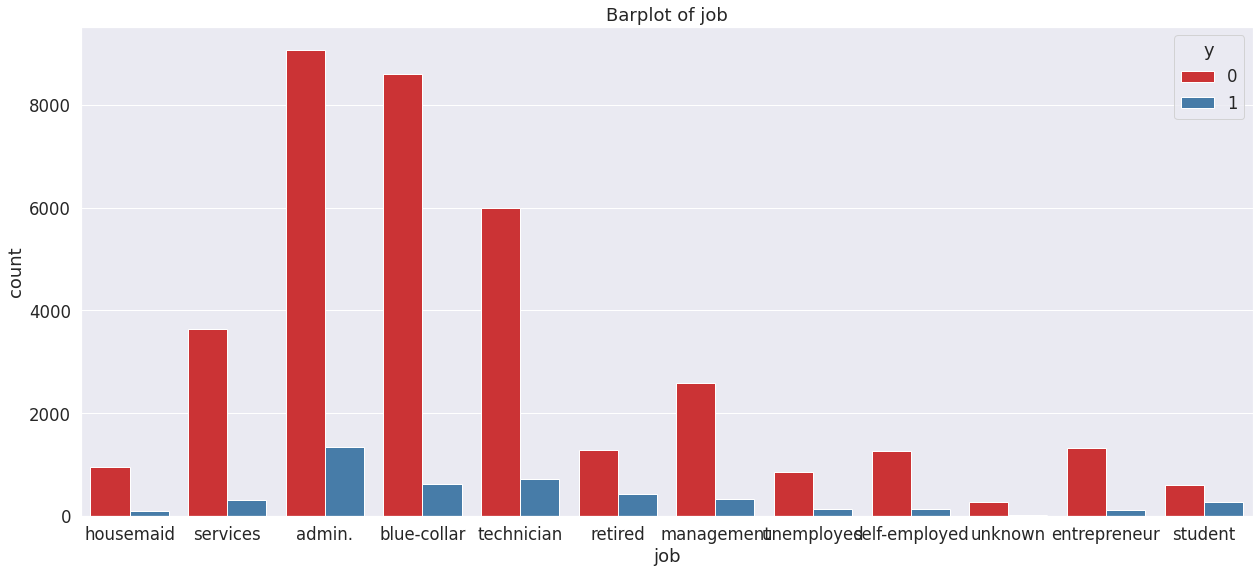

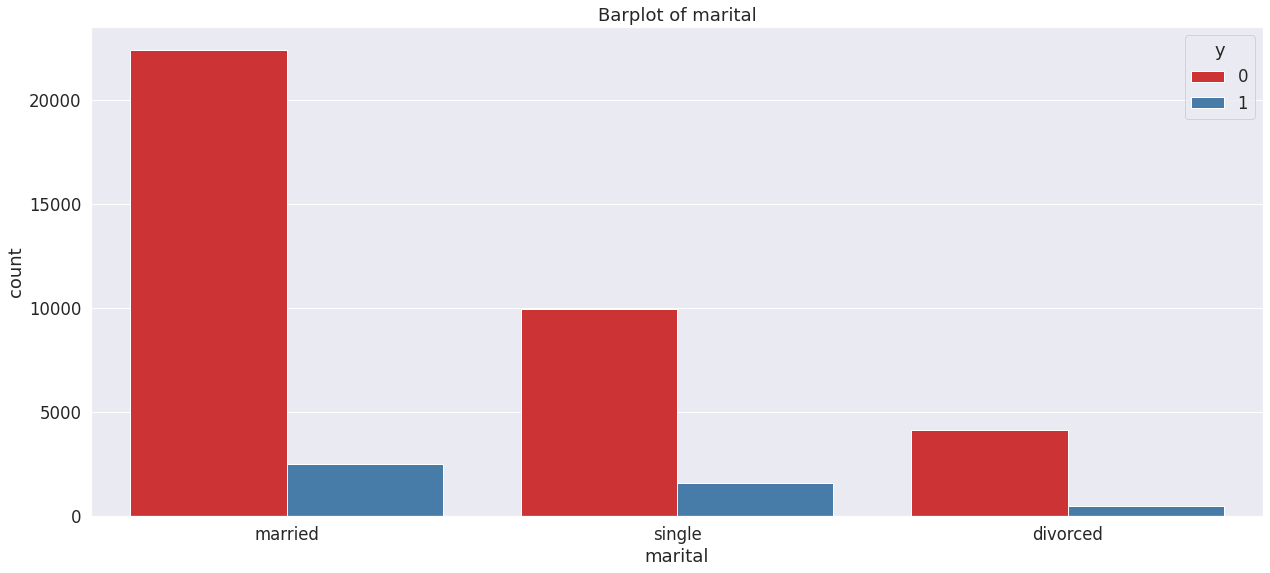

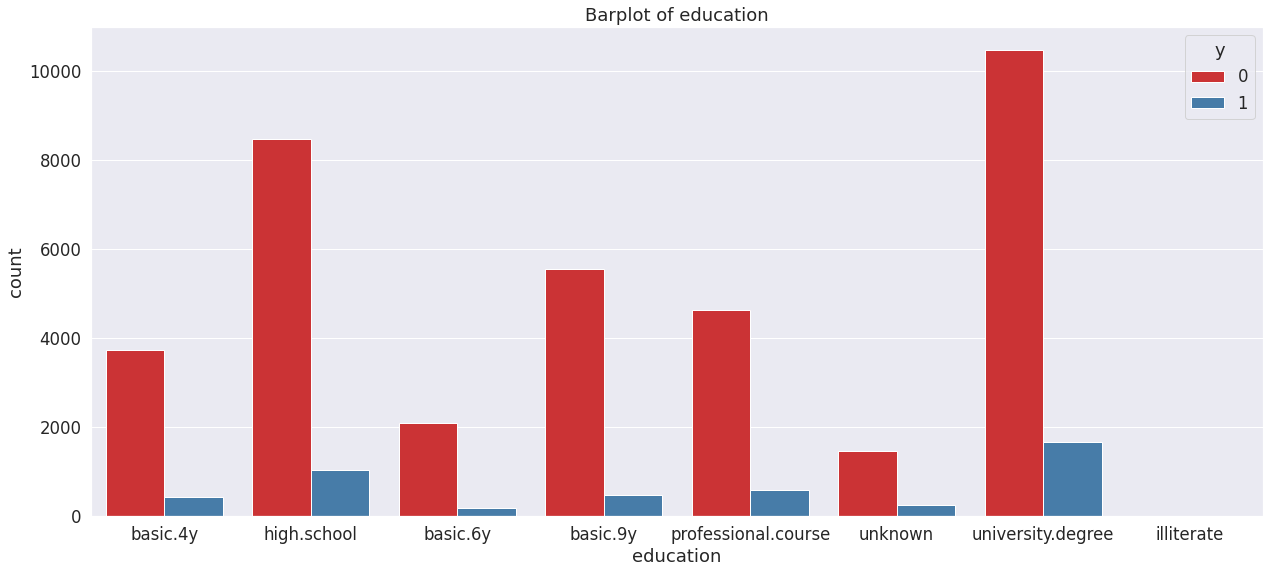

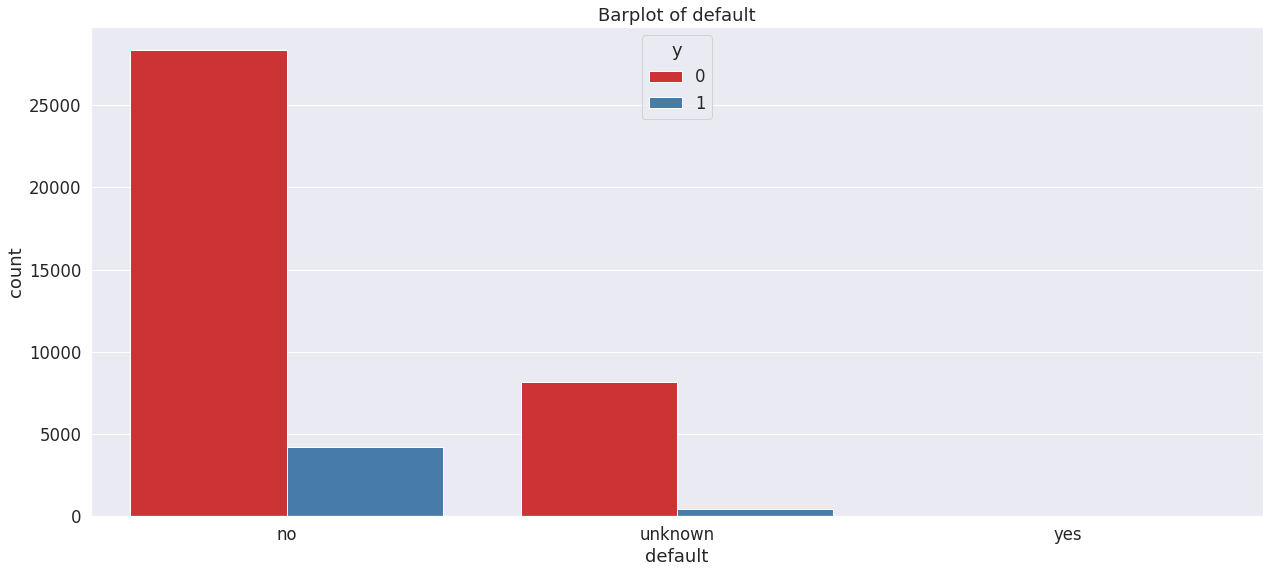

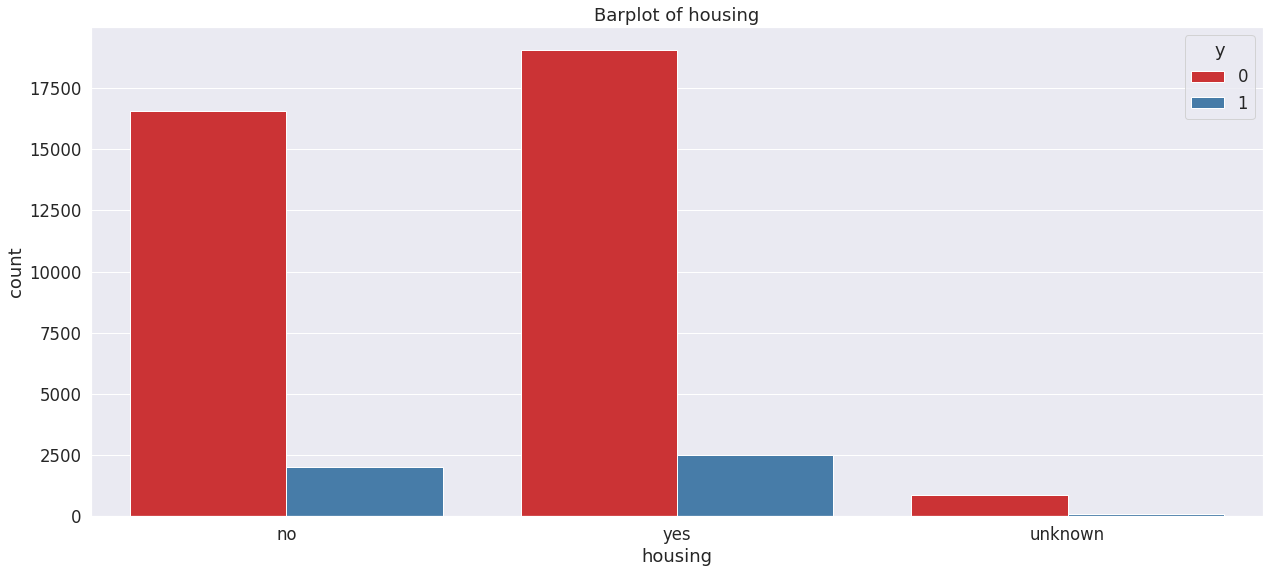

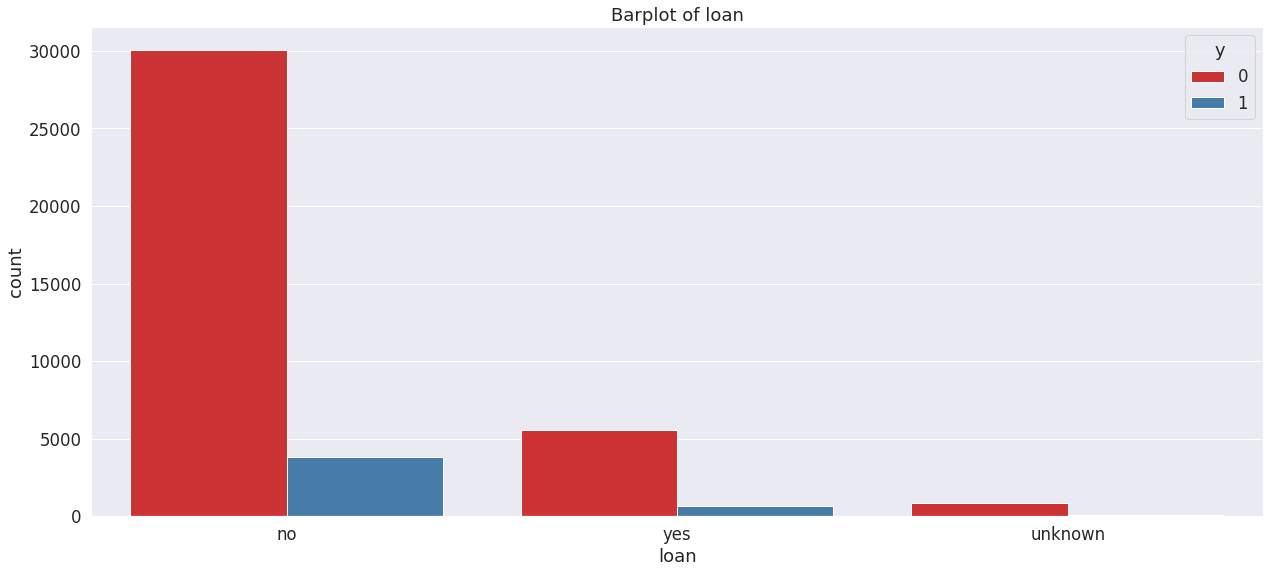

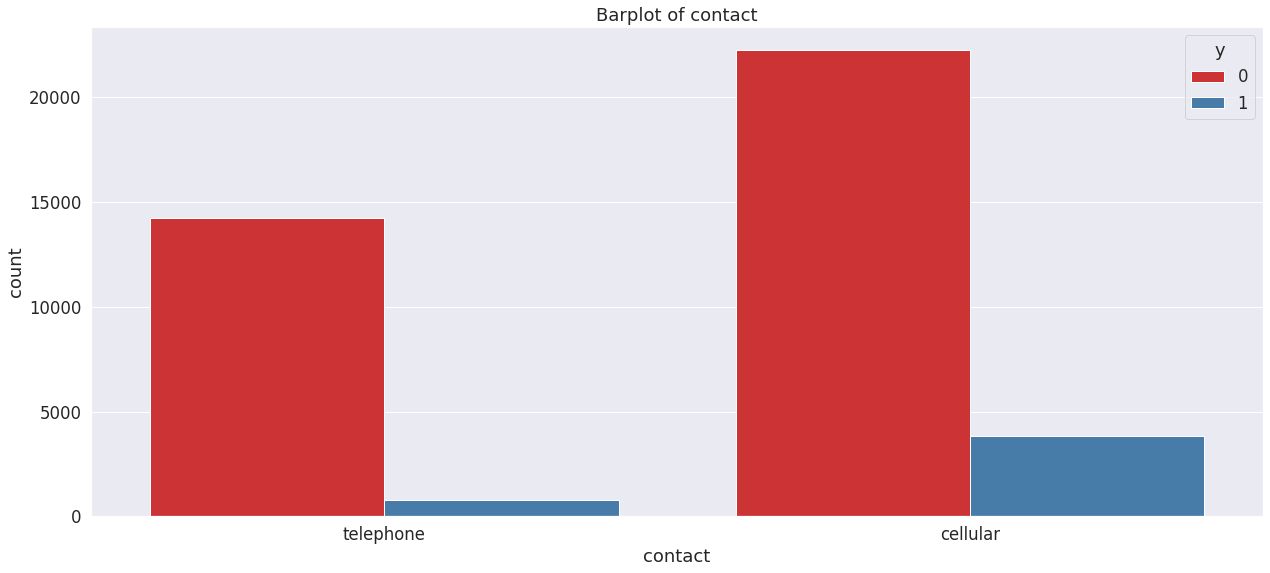

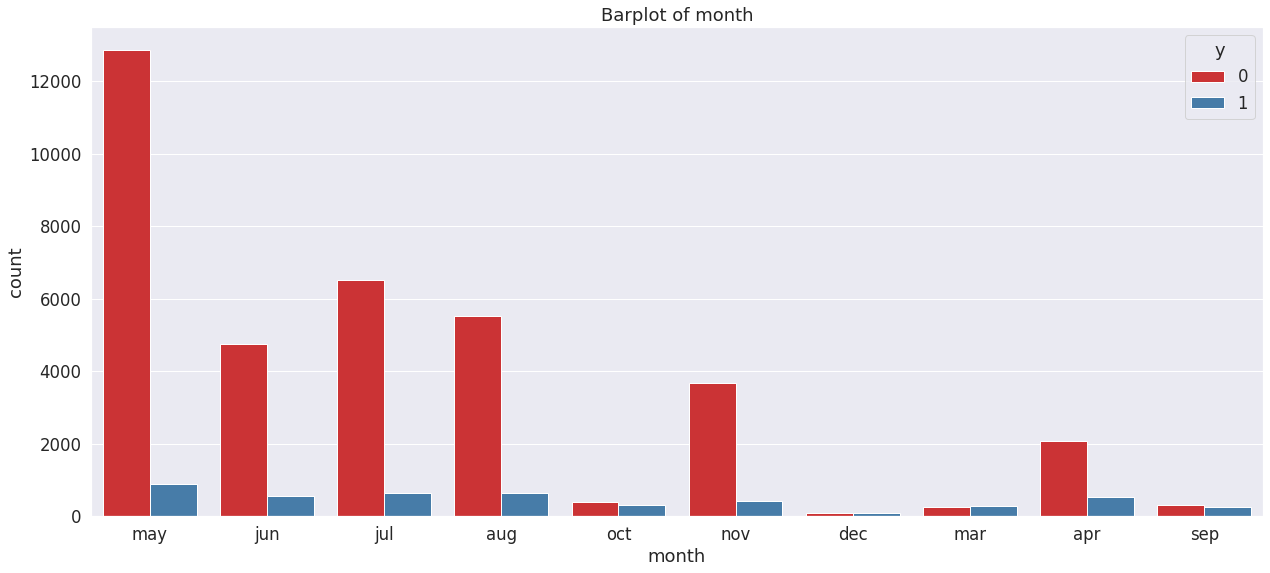

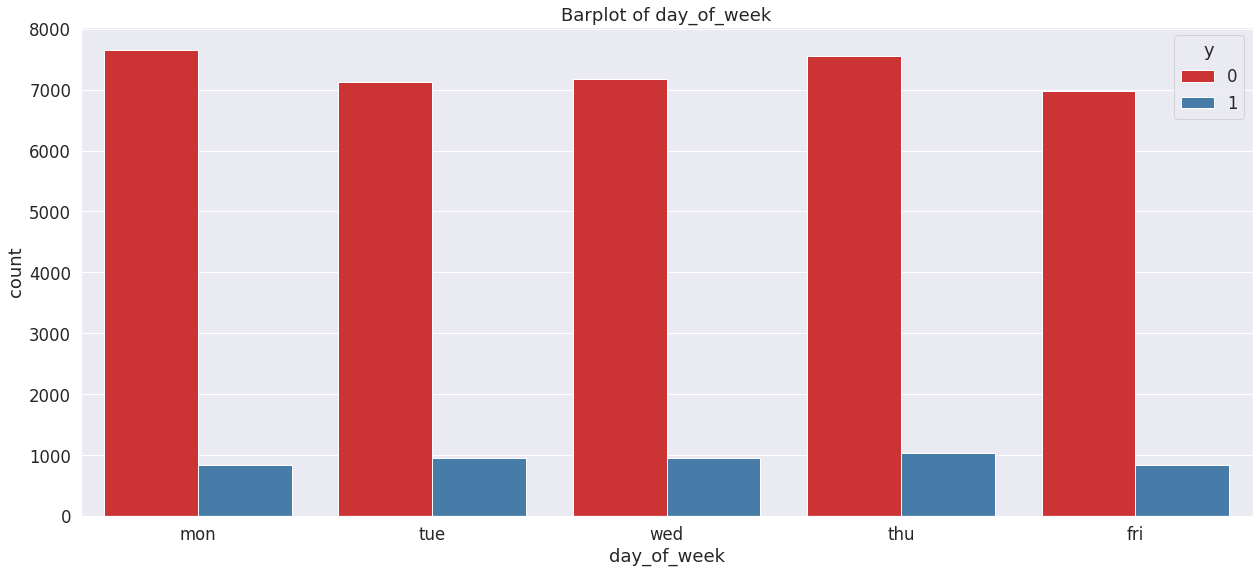

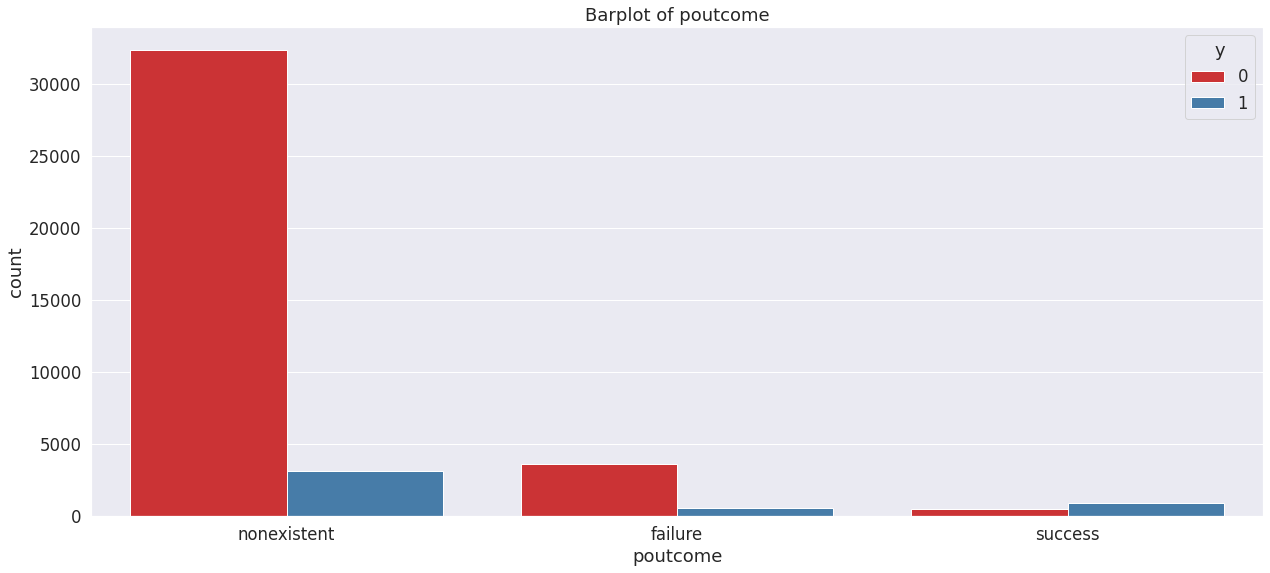

In [ ]:
 for column in cat_list:
    plt.figure(figsize=(21,9))
    sns.countplot(x = column, data = df, hue = 'y', palette = 'Set1')
    plt.title('Barplot of '+column)
    plt.show()

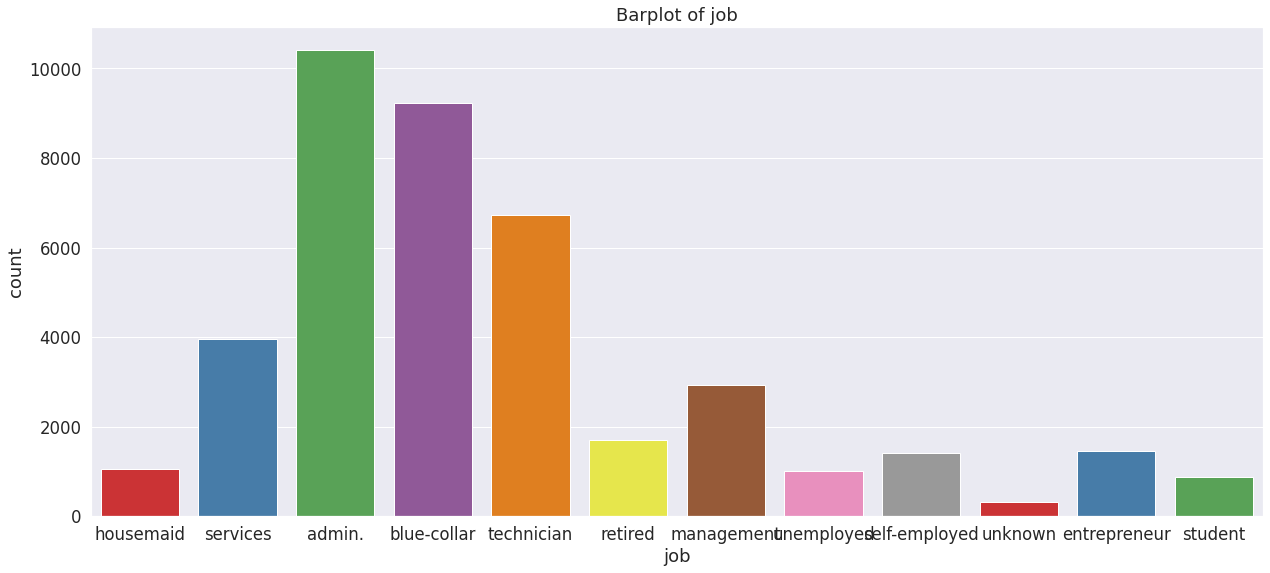

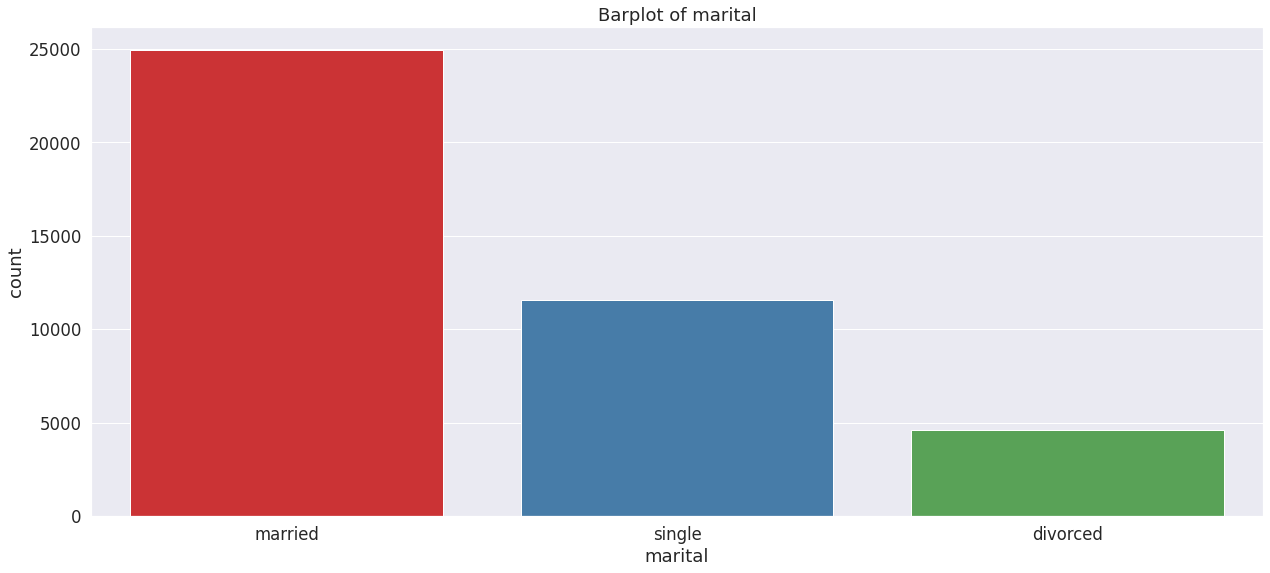

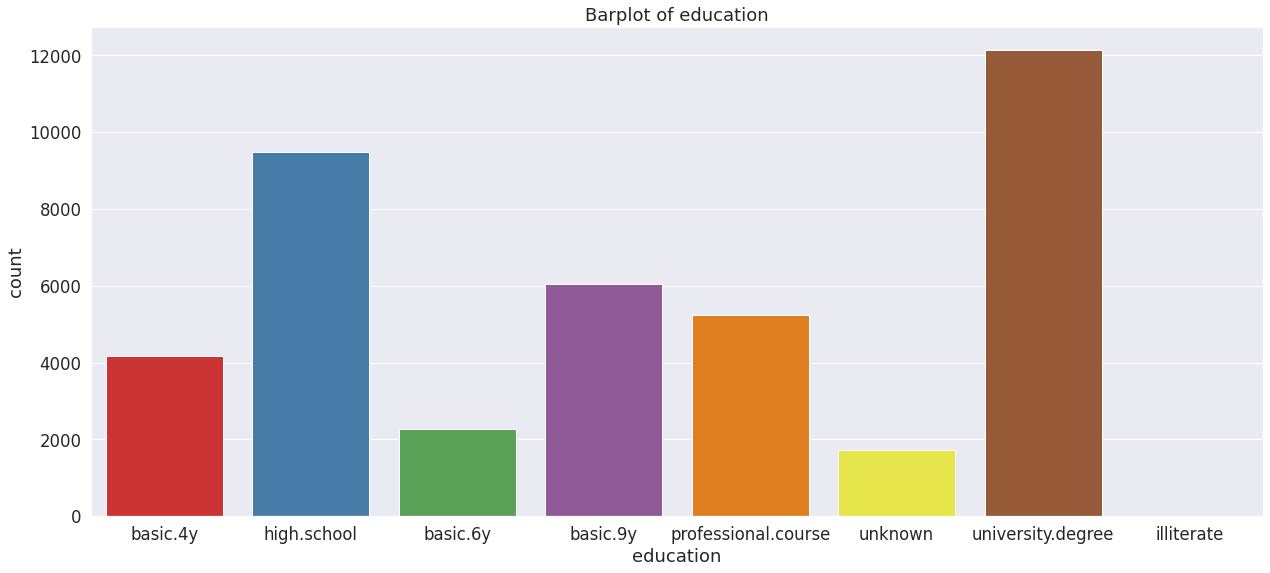

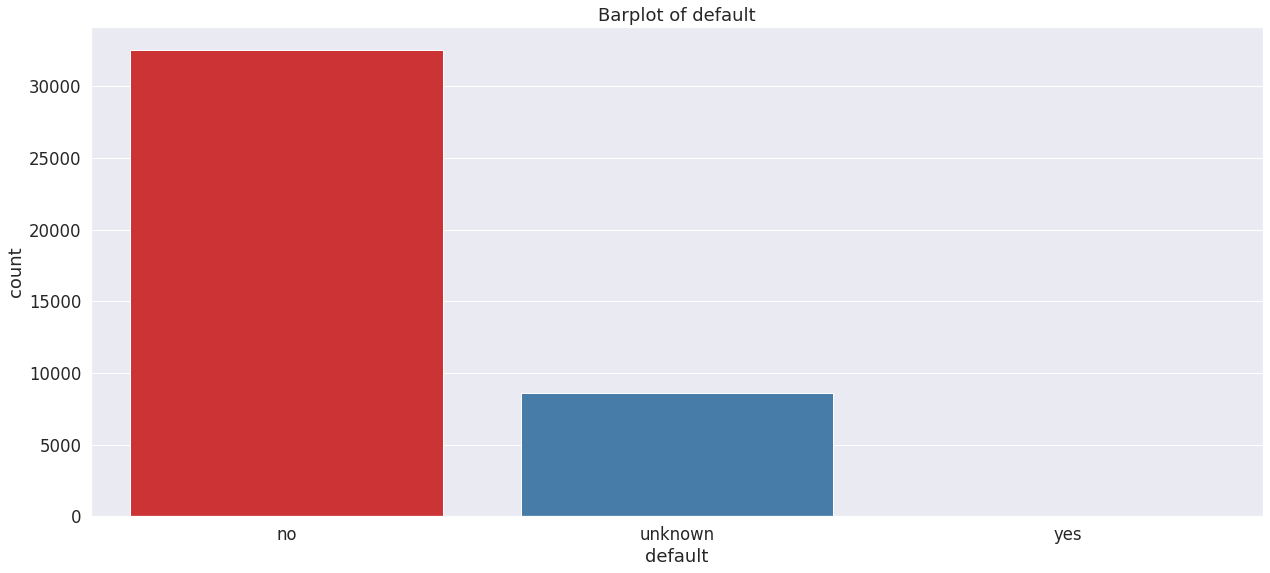

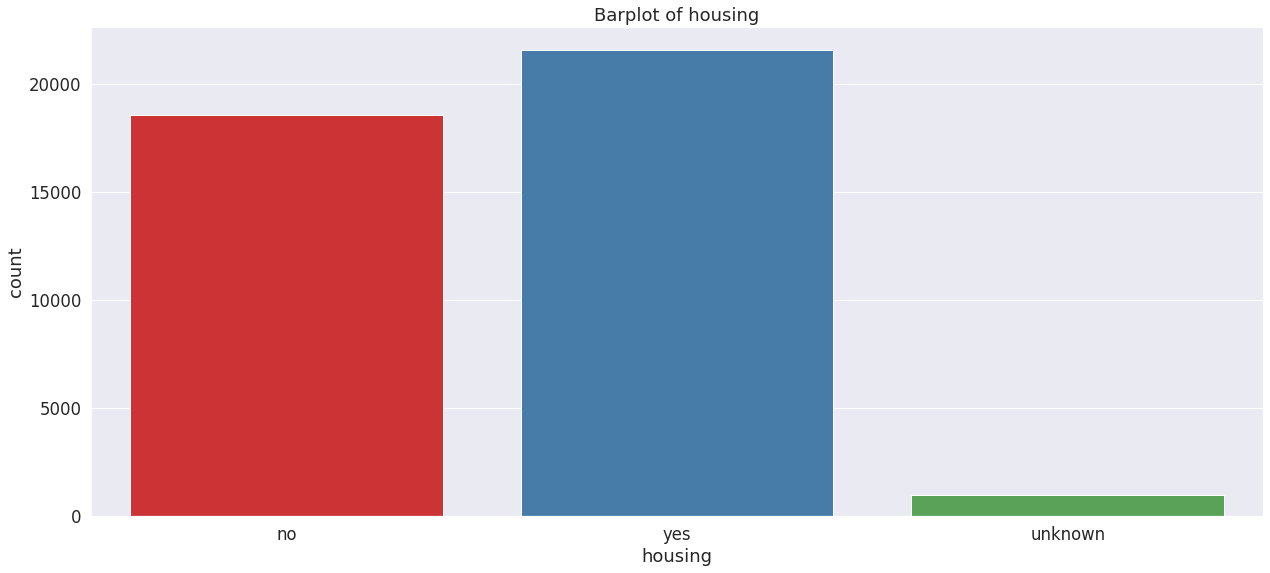

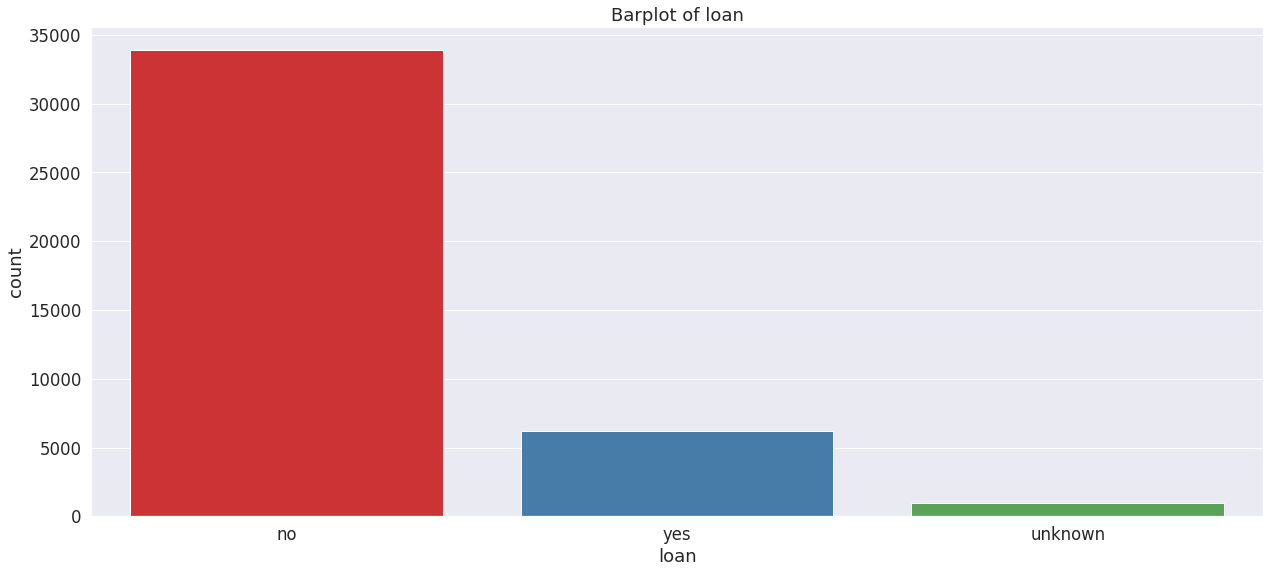

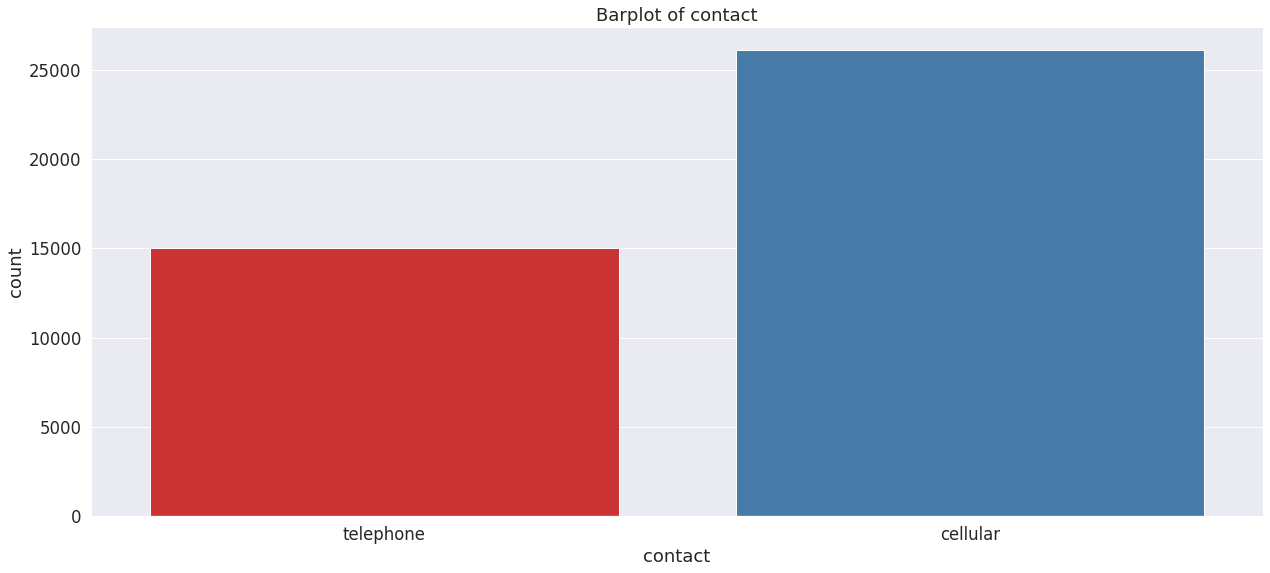

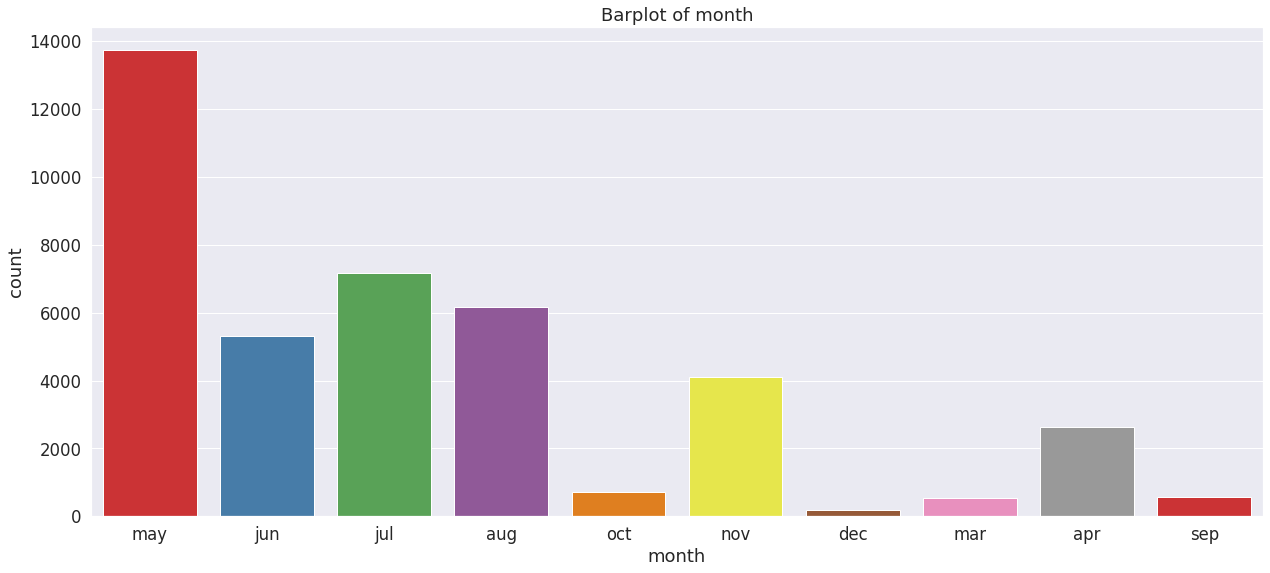

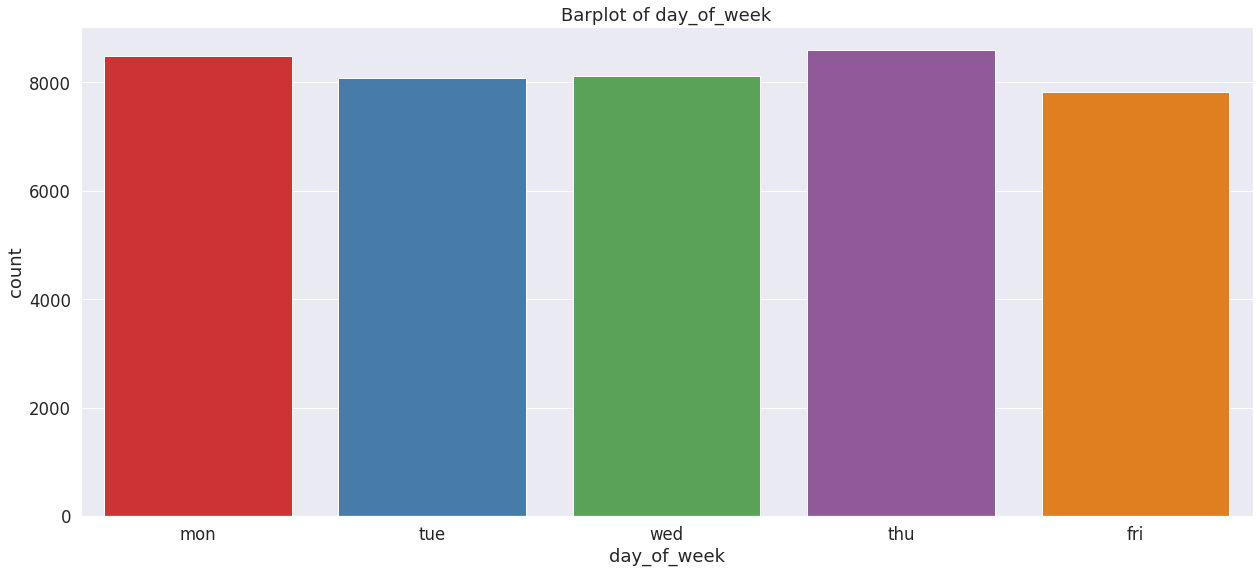

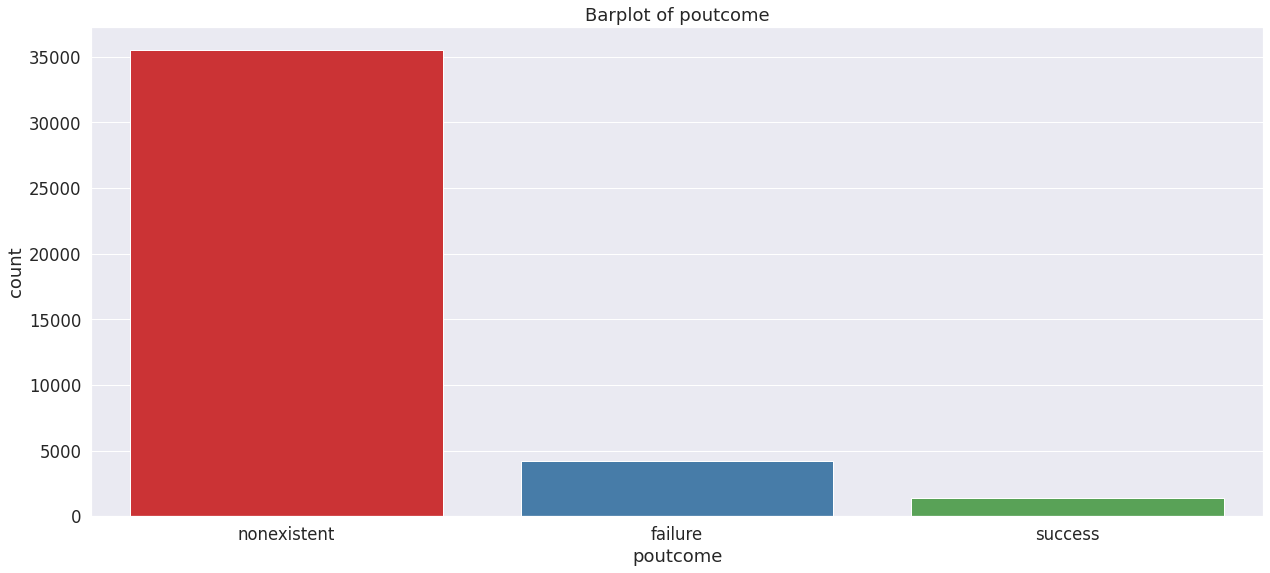

In [ ]:
for column in cat_list:
    plt.figure(figsize=(21,9))
    sns.countplot(x = column, data = df, palette = 'Set1')
    plt.title('Barplot of '+column)
    plt.show()

By looking at the above countplot, we can see client whose job profession is admin has subscribed more to the term deposit, but they are also highest when it comes to not subcribing.

Majority of bank clients are married in status followed by single, divorced.

People who have university degree are showing more interest. Followed by technician, blue-collar jobs. We can say people who are earning good, are more responsive to term deposit.

May-August are the month where client were contacted more by bank. We can say summer is the time where customer are contacted more by bank.Also customer are accepting more term deposits during this time.

Cellular phone is used more to communicate with the clients.

The peoples with university degree education are the most subscribers to term deposit among all types of educated people.

Default denotes if the customer has credit in default or not.

Housing denotes if the customer has a housing loan. From the above graph we can see majority of clients have housing loan.

Looking at the plot of day_of_week with respect to term deposit, we observe all the days have the almost similar distribution for both the classes. We can conclude that this features will not be helpful in predicting the target variable.

From the above plot we can see the previous marketing campaign outcome does not exists. We can say most of the clients are new customer, those who have not been contacted earlier. Looking at the distribution of "1" and "0" we can say those who have contacted earlier are subcribing the term deposit as success rate is higher for term deposit '1'. We can say this features will be helpful in predicting the target variable. 


After doing Exploratory data analysis, we figured out education, job, marital status is very important features for predicting whether the customer will subcribe to term deposit. The second important feature is duration, as it is already mentioned in the dataset description that if the duration is zero, client will not subcribe.

### Categorical Features
Notice that the job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome columns are of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

In [ ]:
#Create a list of element containing the string 'purpose, job,etc.'. Call this list cat_list.
cat_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [ ]:
new_df = pd.get_dummies(df, columns = cat_list)

In [ ]:
data = new_df.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41096 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41096 non-null  int64  
 1   duration                       41096 non-null  int64  
 2   campaign                       41096 non-null  int64  
 3   pdays                          41096 non-null  int64  
 4   previous                       41096 non-null  int64  
 5   emp.var.rate                   41096 non-null  float64
 6   cons.price.idx                 41096 non-null  float64
 7   cons.conf.idx                  41096 non-null  float64
 8   euribor3m                      41096 non-null  float64
 9   nr.employed                    41096 non-null  float64
 10  y                              41096 non-null  int64  
 11  job_admin.                     41096 non-null  uint8  
 12  job_blue-collar                41096 non-null 

In [ ]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
data.shape

(41096, 63)

#### Relationship between duration and decision to sign up for the financial product

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


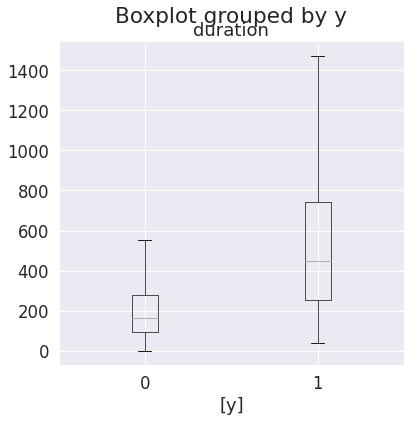

In [ ]:
df[['duration', 'y']].boxplot(by=['y'], sym ='', figsize = [6, 6])


### Train Test Split
Now its time to split our data into a training set and a test set!
The 'y' variable is the one that we will try to predict.

In [ ]:
# split the datasets into training and test data
X = data.drop('y', axis=1)
y = data.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 555, test_size= 0.30)

In [ ]:
X_train.shape

(28767, 62)

In [ ]:
X_test.shape

(12329, 62)

In [ ]:
y_train.shape

(28767,)

In [ ]:
y_test.shape

(12329,)

In [ ]:
#Standardization of the data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Helper function

In [ ]:
def model_perf_v1(model,X_train, X_val, y_train, y_val):
    
    pred_dt = model.predict(X_val)
    print("Accuracy on training set:")
    pred = model.predict(X_train)
    print(metrics.accuracy_score(y_true = y_train, y_pred = pred))
    #
    print("Accuracy on testing set:")
    accuracy = (metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    print(accuracy)
    #confusion matrix
    confusion_matrix_ =  pd.crosstab(index=y_val, columns=pred_dt.ravel(), rownames=['Expected'], colnames=['Predicted'])
    #visualization
    sns.heatmap(confusion_matrix_, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.show()
    #
    print("Recall:")
    recall = (metrics.recall_score(y_val,pred_dt))
    #recall_no = (metrics.recall_score(y_val,pred_dt))
    print(recall)
    #print(recall_no)
    # #
    print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    Specificity = (spec)
    print(Specificity)

    # #
    print("Precision:")
    Precision = (metrics.precision_score(y_val,pred_dt))
    print(Precision)
    # #
    print("Balanced Accuracy:")
    Balanced_Accuracy = (metrics.balanced_accuracy_score(y_val,pred_dt))
    print(Balanced_Accuracy)
    # #
    print("F1 score:")
    F1_score = (metrics.f1_score(y_val,pred_dt))
    print(F1_score)
    #classification_report
    # print(metrics.classification_report(y_test, pred_dt))
    return accuracy,recall,Specificity,Precision,F1_score,Balanced_Accuracy

In [ ]:
def model_perf_to_lst(model,X_val, y_val):
    lst = [str(model)]
    pred_dt = model.predict(X_val)
    #print("Accuracy on testing set:")
    lst.append(metrics.accuracy_score(y_true = y_val, y_pred = pred_dt))
    #print("Recall:")
    lst.append(metrics.recall_score(y_val,pred_dt))
    #
    #print("Specificity:")
    tn, fp, fn, tp = confusion_matrix(y_val,pred_dt).ravel()
    spec = tn/(tn+fp)
    lst.append(spec)
    #
    #print("Precision:")
    lst.append(metrics.precision_score(y_val,pred_dt))
    #
    #print("Balanced Accuracy:")
    lst.append(metrics.balanced_accuracy_score(y_val,pred_dt))
    #
    #print("F1 score:")
    lst.append(metrics.f1_score(y_val,pred_dt))
    return lst

In [ ]:
best_cl_normal = pd.DataFrame(columns = ['Model','Accuracy','Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1 score'])

### Initiate all the classifier from the sklearn library. Keep all parameters with their default values. ( without specifing anything)

Following models will be created: Random Forest, Decision Tree, Logistic Regression, KNN, Naive Bayes, Gradient Boosting RBF classifiers.

Accuracy on training set:
0.9999652379462579
Accuracy on testing set:
0.9147538324276097


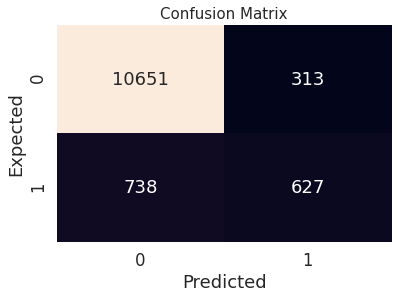

Recall:
0.4593406593406593
Specificity:
0.971452024808464
Precision:
0.6670212765957447
Balanced Accuracy:
0.7153963420745617
F1 score:
0.5440347071583513


In [ ]:
rf = RandomForestClassifier()
# fitting the model
rf.fit(X_train,y_train)
accuracy_rf, recall_rf, Specificity_rf, Precision_rf, F1_score_rf, Balanced_Accuracy_rf = model_perf_v1(rf,X_train,X_test,y_train,y_test)
rf_perf = model_perf_to_lst(rf, X_test, y_test) 

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = rf_perf

Accuracy on training set:
1.0
Accuracy on testing set:
0.8952875334577014


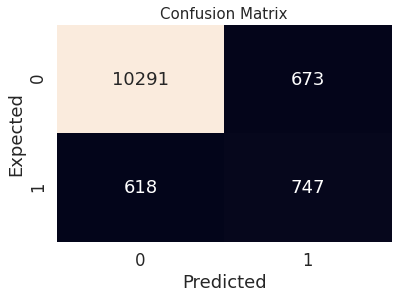

Recall:
0.5472527472527473
Specificity:
0.9386172929587742
Precision:
0.526056338028169
Balanced Accuracy:
0.7429350201057607
F1 score:
0.5364452423698385


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt,recall_dt,Specificity_dt,Precision_dt,F1_score_dt,Balanced_Accuracy_dt = model_perf_v1(dt,X_train,X_test,y_train,y_test)
dt_perf = model_perf_to_lst(dt, X_test, y_test)

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = dt_perf

Accuracy on training set:
0.9109396183126499
Accuracy on testing set:
0.911996106740206


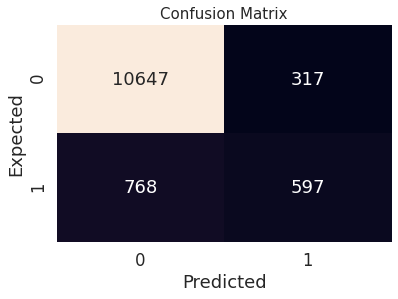

Recall:
0.43736263736263736
Specificity:
0.9710871944545786
Precision:
0.6531728665207878
Balanced Accuracy:
0.704224915908608
F1 score:
0.5239139973672663


In [ ]:
log = LogisticRegression(max_iter=2500)

# fitting the model
log.fit(X_train, y_train)
accuracy_log, recall_log, Specificity_log, Precision_log, F1_score_log, Balanced_Accuracy_log = model_perf_v1(log,X_train,X_test,y_train,y_test)
log_perf = model_perf_to_lst(log, X_test, y_test)

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = log_perf

Accuracy on training set:
0.9324225675252894
Accuracy on testing set:
0.8947197664044123


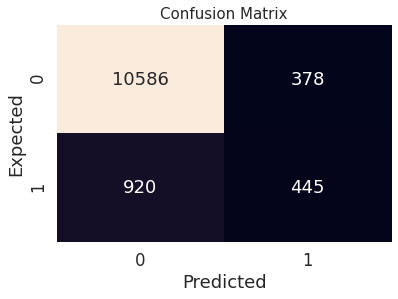

Recall:
0.326007326007326
Specificity:
0.9655235315578257
Precision:
0.5407047387606319
Balanced Accuracy:
0.6457654287825758
F1 score:
0.40676416819012795


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)
accuracy_knn, recall_knn, Specificity_knn, Precision_knn, F1_score_knn, Balanced_Accuracy_knn = model_perf_v1(knn,X_train,X_test,y_train,y_test)
knn_perf = model_perf_to_lst(knn, X_test, y_test)

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = knn_perf

Accuracy on training set:
0.7343136232488615
Accuracy on testing set:
0.7329061562170492


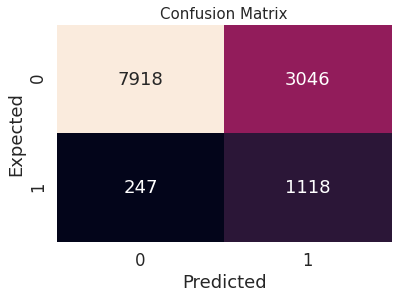

Recall:
0.819047619047619
Specificity:
0.722181685516235
Precision:
0.26849183477425553
Balanced Accuracy:
0.770614652281927
F1 score:
0.40441309459215047


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
accuracy_gnb, recall_gnb, Specificity_gnb, Precision_gnb, F1_score_gnb, Balanced_Accuracy_gnb = model_perf_v1(gnb,X_train,X_test,y_train,y_test)
gnb_perf = model_perf_to_lst(gnb, X_test, y_test)

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = gnb_perf

Accuracy on training set:
0.9220634755101331
Accuracy on testing set:
0.9181604347473437


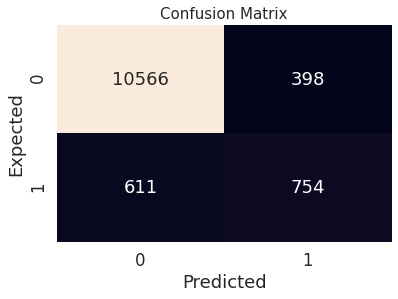

Recall:
0.5523809523809524
Specificity:
0.9636993797883984
Precision:
0.6545138888888888
Balanced Accuracy:
0.7580401660846754
F1 score:
0.5991259435836314


In [ ]:
grb = GradientBoostingClassifier()
grb.fit(X_train, y_train)
accuracy_grb, recall_grb, Specificity_grb, Precision_grb, F1_score_grb, Balanced_Accuracy_grb = model_perf_v1(grb,X_train,X_test,y_train,y_test)
grb_perf = model_perf_to_lst(grb, X_test, y_test)

In [ ]:
best_cl_normal.loc[len(best_cl_normal)] = grb_perf

## **Comparison table for default classifiers**

In [ ]:
best_cl_normal

,Model,Accuracy,Recall,Specificity,Precision,Balanced Accuracy,F1 score
0,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.914754,0.459341,0.971452,0.667021,0.715396,0.544035
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.895288,0.547253,0.938617,0.526056,0.742935,0.536445
2,"LogisticRegression(C=1.0, class_weight=None, d...",0.911996,0.437363,0.971087,0.653173,0.704225,0.523914
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.894720,0.326007,0.965524,0.540705,0.645765,0.406764
4,"GaussianNB(priors=None, var_smoothing=1e-09)",0.732906,0.819048,0.722182,0.268492,0.770615,0.404413
5,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.918160,0.552381,0.963699,0.654514,0.758040,0.599126


By looking at all the classifier model accuracy we found gradient boosting classifier without hyperparameter tunning give more information about target data.


### **Performing grid search by hyperparameters tunning**

In [ ]:
# Helper function for grid search
def grid_search_helper():
    
    pipeline1 = Pipeline((
    ('clf', DecisionTreeClassifier()),
    ))

    pipeline2 = Pipeline((
    ('clf', LogisticRegression()),
    ))

    pipeline3 = Pipeline((
    ('clf', KNeighborsClassifier()),
    ))

    pipeline4 = Pipeline((
    ('clf', GaussianNB()),
    ))

    pipeline5 = Pipeline((
    ('clf', GradientBoostingClassifier()),
    ))

    parameters1 = {
    'clf__min_samples_split': [5, 10, 20, 30, 40, 50], 
    'clf__max_depth': list(range(1,15))
    }

    parameters2 = {
    'clf__C': np.logspace(0, 4, 10)
     }
    
    parameters3 = {
    'clf__n_neighbors': [1,3,5,7,9,11,15]
    }

    parameters4 = {
    'clf__var_smoothing': np.logspace(0,-9)
    }
    
    parameters5 ={
    'clf__n_estimators':[1, 2, 5, 10, 20, 50],
    'clf__learning_rate':[0.1, 0.3, 0.5, 0.7, 1]
    }

    pars = [parameters1, parameters2, parameters3, parameters4, parameters5]
    pips = [pipeline1, pipeline2, pipeline3, pipeline4, pipeline5]

    print("starting Gridsearch")
    dict_best_params ={}
    for i in range(len(pars)):
        print(pars[i])
        print(pips[i])
        gs = GridSearchCV(pips[i], pars[i], cv= 3, n_jobs=-1)
        gs.fit(X_train, y_train)
        print("finished Gridsearch\n")
        #print(gs.best_estimator_)
        dict_best_params[i]= gs.best_estimator_
    return dict_best_params

In [ ]:
 best_params_dict = grid_search_helper()

starting Gridsearch
{'clf__min_samples_split': [5, 10, 20, 30, 40, 50], 'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
Pipeline(memory=None,
         steps=(('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best')),),
         verbose=False)
finished Gridsearch

{'clf__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+

### **Hyperparameter Tunning along with grid search for all the classifier**

#### Decision Tree Classifier

Accuracy on training set:
0.9174401223624292
Accuracy on testing set:
0.91540270905994


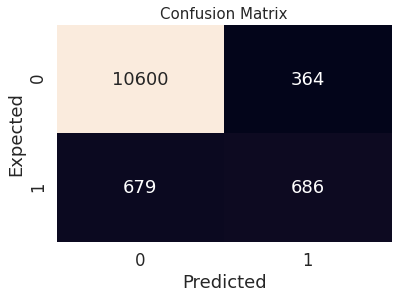

Recall:
0.5025641025641026
Specificity:
0.9668004377964247
Precision:
0.6533333333333333
Balanced Accuracy:
0.7346822701802636
F1 score:
0.5681159420289855


In [ ]:
accuracy_dt_h,recall_dt_h,Specificity_dt_h,Precision_dt_h,F1_score_dt_h,Balanced_Accuracy_dt_h = model_perf_v1(best_params_dict[0],X_train,X_test,y_train,y_test)

From above performace metrics of decision tree classifier model, we observe change in accuracy score but recall score decreased with hyperparameter tunning approach along with grid search.

### Logistic Regression Classifier

Accuracy on training set:
0.910696283936455
Accuracy on testing set:
0.9120772163192473


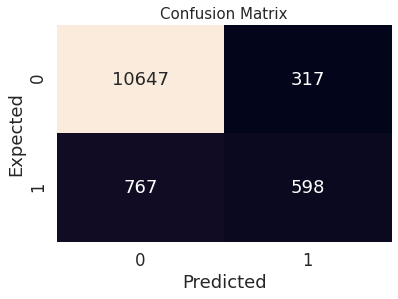

Recall:
0.4380952380952381
Specificity:
0.9710871944545786
Precision:
0.653551912568306
Balanced Accuracy:
0.7045912162749084
F1 score:
0.524561403508772


In [ ]:
accuracy_log_h, recall_log_h, Specificity_log_h, Precision_log_h, F1_score_log_h, Balanced_Accuracy_log_h = model_perf_v1(best_params_dict[1],X_train,X_test,y_train,y_test)

#### KNearestNeighbours Classifier

Accuracy on training set:
0.9051343553377134
Accuracy on testing set:
0.9003974369373023


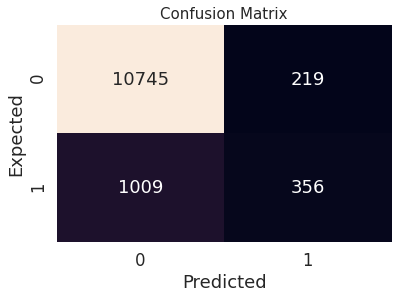

Recall:
0.2608058608058608
Specificity:
0.980025538124772
Precision:
0.6191304347826087
Balanced Accuracy:
0.6204156994653164
F1 score:
0.3670103092783505


In [ ]:
accuracy_knn_h, recall_knn_h, Specificity_knn_h, Precision_knn_h, F1_score_knn_h, Balanced_Accuracy_knn_h = model_perf_v1(best_params_dict[2],X_train,X_test,y_train,y_test)

#### Guassian Naive bayes classifier

Accuracy on training set:
0.8837209302325582
Accuracy on testing set:
0.8831210966015086


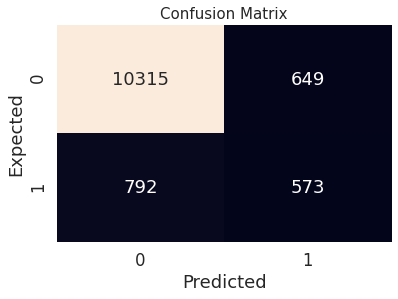

Recall:
0.4197802197802198
Specificity:
0.9408062750820868
Precision:
0.46890343698854337
Balanced Accuracy:
0.6802932474311533
F1 score:
0.4429841515268651


In [ ]:
accuracy_gnb_h, recall_gnb_h, Specificity_gnb_h, Precision_gnb_h, F1_score_gnb_h, Balanced_Accuracy_gnb_h = model_perf_v1(best_params_dict[3],X_train,X_test,y_train,y_test)

### Gradient Boosting Classifier

Accuracy on training set:
0.920742517467932
Accuracy on testing set:
0.916538243166518


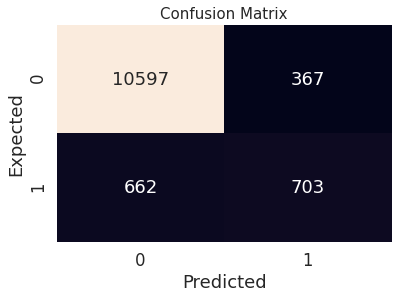

Recall:
0.515018315018315
Specificity:
0.9665268150310106
Precision:
0.6570093457943925
Balanced Accuracy:
0.7407725650246628
F1 score:
0.5774127310061601


In [ ]:
accuracy_grb_h, recall_grb_h, Specificity_grb_h, Precision_grb_h, F1_score_grb_h, Balanced_Accuracy_grb_h = model_perf_v1(best_params_dict[4],X_train,X_test,y_train,y_test)

From above performace metrics of gradient boosting classifier model, we observe no change in accuracy score but slight change in recall score  with hyperparameter tunning approach along with grid search.

#### Random Forest classifier

In [ ]:
# 3 fold cross validation
k=3
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50], 
    max_depth = list(range(1,15)), 
    n_estimators = [1, 2, 5, 10, 20, 50] 
)
params

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'n_estimators': [1, 2, 5, 10, 20, 50]}

In [ ]:
rf_1 = RandomForestClassifier()
rf_gs = GridSearchCV(estimator=rf_1, param_grid=params, cv=k, n_jobs=-1 )
# fitting the random forest model
rf_gs.fit(X_train, y_train)
best_estimator_rf = rf_gs.best_estimator_

Accuracy on training set:
0.9344735286960754
Accuracy on testing set:
0.9139427366371968


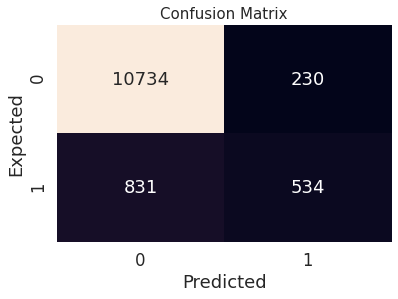

Recall:
0.3912087912087912
Specificity:
0.979022254651587
Precision:
0.6989528795811518
Balanced Accuracy:
0.6851155229301891
F1 score:
0.5016439643024895


In [ ]:
accuracy_rf_h, recall_rf_h, Specificity_rf_h, Precision_rf_h, F1_score_rf_h, Balanced_Accuracy_rf_h = model_perf_v1(best_estimator_rf,X_train,X_test,y_train,y_test)

From above performace metrics of Random Forest classifier model, we observe no change in accuracy score but recall score decreased with hyperparameter tunning approach along with grid search.

### **Comparison Table for Hyper-tunning parameters**

In [ ]:
column_labels = ['classifier','accuracy','recall','specificity','precision','f1-score','balanced']
# Random forest classifier best model performance 
df1 = pd.DataFrame([['RandomForest_h',accuracy_rf_h, recall_rf_h, Specificity_rf_h, Precision_rf_h, F1_score_rf_h, Balanced_Accuracy_rf_h]],columns =column_labels )
# decision tree classifier best model
df2= pd.DataFrame([['DecisionTreeT_h',accuracy_dt_h, recall_dt_h, Specificity_dt_h, Precision_dt_h, F1_score_dt_h, Balanced_Accuracy_dt_h]],columns =column_labels )
# logistic regression best model 
df3 = pd.DataFrame([['LogisticRegression_h', accuracy_log_h, recall_log_h, Specificity_log_h, Precision_log_h, F1_score_log_h, Balanced_Accuracy_log_h]],columns =column_labels )
# guassian naive bayes best model performance using PCA
df4 = pd.DataFrame([['GuassianNB_h',accuracy_gnb_h, recall_gnb_h, Specificity_gnb_h, Precision_gnb_h, F1_score_gnb_h, Balanced_Accuracy_gnb_h]],columns =column_labels )
# KNN best model performance 
df5 = pd.DataFrame([['KNN_h',accuracy_knn_h, recall_knn_h, Specificity_knn_h, Precision_knn_h, F1_score_knn_h, Balanced_Accuracy_knn_h]],columns =column_labels )
# Gradient Boosting classifier best model performance
df6 = pd.DataFrame([['GradientBoosting_h',accuracy_grb_h, recall_grb_h, Specificity_grb_h, Precision_grb_h, F1_score_grb_h, Balanced_Accuracy_grb_h]],columns =column_labels )
combined_data_h = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

In [ ]:
combined_data_h

,classifier,accuracy,recall,specificity,precision,f1-score,balanced
0,RandomForest_h,0.913943,0.391209,0.979022,0.698953,0.501644,0.685116
0,DecisionTreeT_h,0.915403,0.502564,0.966800,0.653333,0.568116,0.734682
0,LogisticRegression_h,0.912077,0.438095,0.971087,0.653552,0.524561,0.704591
0,GuassianNB_h,0.883121,0.419780,0.940806,0.468903,0.442984,0.680293
0,KNN_h,0.900397,0.260806,0.980026,0.619130,0.367010,0.620416
0,GradientBoosting_h,0.916538,0.515018,0.966527,0.657009,0.577413,0.740773


Looking at the above comparision table for hyper parameter tunning, we observe gradient boosting classifier model is best.

### **Exploring PCA**

In [ ]:
import plotly.express as ex

In [ ]:
Y = df['y']
# print(dff)

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    colors = {'1':'pink', '0':'blue'}
    plt.scatter(xs * scalex,ys * scaley, c= y.apply(lambda x: colors[x]))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))


In [ ]:
def PCA_transformation(dataset):
  x=dataset.drop(['y'], axis=1) #droping column # a the features
  x=StandardScaler().fit_transform(x) # standarize the variables
  pca=PCA(n_components=2) #first 2 leading principal components
  PC=pca.fit_transform(x)
  principalDF=pd.DataFrame(data=PC,columns=['pc1','pc2'])
  print("First 2 leading principal components")
  finalDf = pd.concat([principalDF, data[['y']]], axis = 1)
  print(finalDf.head())
  # myplot(PC[:,0:2],np.transpose(pca.components_[0:2, :]))
  # plt.show()
  fx = dataset.drop(['y'], axis=1) #droping column
  PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
  components=fx.columns.tolist()
  loadingdf=pd.DataFrame(PCloadings,columns=('PC1','PC2'))
  loadingdf["variable"]=components
  print("PCA Loadings")
  print(loadingdf)
  return loadingdf,x


In [ ]:

def cumluative_varienceGraph(n_components,x):
  pca_test = PCA(n_components=n_components)
  pca_test.fit(x)
  sns.set(style='whitegrid')
  plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
  plt.xlabel('number of components')
  plt.ylabel('cumulative explained variance')
  plt.axvline(linewidth=4, color='r', linestyle = '--', x=46, ymin=0, ymax=1)
  display(plt.show())
  evr = pca_test.explained_variance_ratio_
  cvr = np.cumsum(pca_test.explained_variance_ratio_)
  pca_df = pd.DataFrame()
  pca_df['Cumulative Variance Ratio'] = cvr
  pca_df['Explained Variance Ratio'] = evr

In [ ]:
def plotPCA(loadingdf):
  fig=ex.scatter(x=loadingdf['PC1'],y=loadingdf['PC2'],text=loadingdf['variable'],)
  fig.update_layout(
  height=600,width=500,
  title_text='loadings plot')
  fig.update_traces(textposition='bottom center')
  fig.add_shape(type="line",
  x0=-0, y0=-0.5,x1=-0,y1=2.5,
  line=dict(color="RoyalBlue",width=3)
  )
  fig.add_shape(type="line",
  x0=-1, y0=0,x1=1,y1=0,
  line=dict(color="RoyalBlue",width=3)
  )
  fig.show()

First 2 leading principal components
        pc1       pc2    y
0 -2.138045  2.336784  0.0
1 -2.573533  2.560814  0.0
2 -1.726158  0.633776  0.0
3 -1.926238  1.036604  0.0
4 -1.903958  1.191214  0.0
PCA Loadings
         PC1       PC2              variable
0  -0.033195  0.354352                   age
1   0.043055  0.027895              duration
2  -0.175063 -0.041416              campaign
3  -0.481831 -0.244205                 pdays
4   0.686791  0.302667              previous
..       ...       ...                   ...
57 -0.015194  0.009378       day_of_week_tue
58 -0.025483  0.000716       day_of_week_wed
59  0.547140  0.200260      poutcome_failure
60 -0.722817 -0.299174  poutcome_nonexistent
61  0.455405  0.232916      poutcome_success

[62 rows x 3 columns]


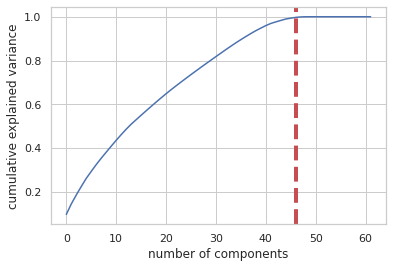

None

In [ ]:
loadingsDF,x_full = PCA_transformation(data)
cumluative_varienceGraph(62,x_full)

The ideal components are 46,95% cut-off value with 46 number of components from 62

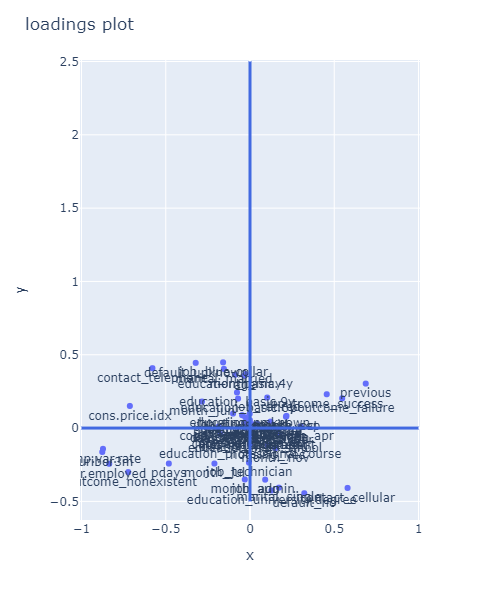

In [ ]:
#plotPCA function generated the newplot.png file which we are uploading here and displaying.
#Converting ipynb file in colab to html did not show the below image so we are saving the picture in image and manually displaying.

plotPCA(loadingsDF)
from IPython.display import Image
Image('newplot.png')

From the plot above we can see that there are many varibales that have less weightable higher weightable varibales arejob blue_collar, contact telephone and defualt_unkown. We would want to explore PCA more to find higher weightable variables. 

It is clear that martital married and blue collar job people with education of 4 years are two heavily weighted features.

Logistic Regression with **PCA** 

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=43)
X_pca = pca.fit_transform(x_full)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())


         0         1         2         3         4         5         6   \
0 -2.138024  2.333661 -0.178764  1.232175 -0.565714 -1.957714 -0.430562   
1 -2.573363  2.562840  0.477053 -0.011948 -0.822362 -0.549637 -0.748131   
2 -1.725983  0.631196  1.443510 -0.568783 -0.713549 -0.335646  1.864104   
3 -1.926228  1.031268  1.275879  0.243650 -0.832721 -1.750789 -0.343200   
4 -1.903882  1.185243  1.552207 -0.222040  1.237438 -1.099605  0.211662   

         7         8         9         10        11        12        13  \
0 -0.354217 -0.298676 -0.040870  0.935283 -1.115147  0.058043  1.329108   
1 -0.610015  0.757035  0.201822  3.275354  1.683457 -0.437876 -1.773976   
2 -0.214848 -0.438932 -1.363563  2.604932  0.573183 -1.815302 -1.300672   
3 -0.684802 -0.142264  0.121030 -0.438680  0.154452 -1.042602 -0.640914   
4 -1.132211 -2.452797  1.872789  3.233771  0.422096 -1.415202 -0.977421   

         14        15        16        17        18        19        20  \
0  1.316705 -0.929502  

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.20, random_state=2)

Accuracy on training set:
0.9100559678793041
Accuracy on testing set:
0.9093673965936739


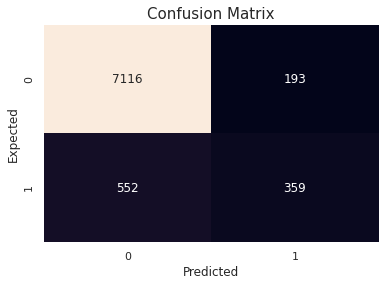

Recall:
0.3940724478594951
Specificity:
0.9735941989328225
Precision:
0.6503623188405797
Balanced Accuracy:
0.6838333233961588
F1 score:
0.49077238550922764


In [ ]:
#Initialize the logistic regression model
logpca = LogisticRegression(max_iter=2500)

# Train the model
logpca.fit(X_train_pca, y_train_pca)
accuracy_log_pca,recall_log_pca,Specificity_log_pca,Precision_log_pca,F1_score_log_pca,Balanced_Accuracy_log_pca = model_perf_v1(logpca,X_train_pca,X_test_pca,y_train_pca,y_test_pca)



### Removing Varibales for PCA to improve accuracy



In [ ]:
#dropping varibales not being used in PCA 
y= df['y']
dff = df.drop(['default','month','day_of_week','campaign','poutcome','housing','contact'], axis=1) #droping column

In [ ]:
dff['y'].replace('yes','1',inplace=True)
dff['y'].replace('no','0',inplace=True)
y=dff['y'] # assign y variable - the target 
dff = pd.get_dummies(dff, columns = ['education', 'marital','job','loan'])


First 2 leading principal components
        pc1       pc2    y
0 -1.821741  2.619953  0.0
1 -1.487264  0.564340  0.0
2 -1.424279 -0.157760  0.0
3 -1.489013  0.390836  0.0
4 -1.464163  0.371313  0.0
PCA Loadings
         PC1       PC2                       variable
0  -0.058638  0.599318                            age
1   0.044505  0.023868                       duration
2  -0.448712 -0.083116                          pdays
3   0.596350  0.107419                       previous
4  -0.948292 -0.145303                   emp.var.rate
5  -0.709212 -0.081345                 cons.price.idx
6  -0.190438  0.011115                  cons.conf.idx
7  -0.954212 -0.141824                      euribor3m
8  -0.917032 -0.150804                    nr.employed
9  -0.083587  0.461013             education_basic.4y
10 -0.065577  0.190013             education_basic.6y
11 -0.075936  0.236097             education_basic.9y
12  0.049192 -0.233243          education_high.school
13  0.000207  0.029297          

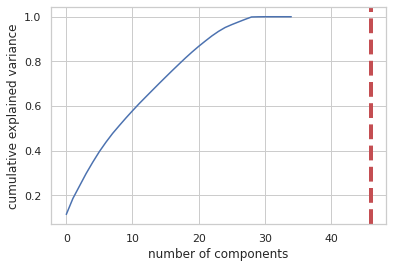

None

In [ ]:
loadingsDF,x_defined_components = PCA_transformation(dff)
cumluative_varienceGraph(35,x_defined_components)

As we see from the graph above with the elbow knee method, the 95% varience is at no. of components with 29 so we will use 29 

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
X_pca1 = pca.fit_transform(x_defined_components)

# Get the transformed dataset
X_pca1 = pd.DataFrame(X_pca1)
print(X_pca1.head())

         0         1         2         3         4         5         6   \
0 -1.822041  2.620139  0.248845 -1.152239 -0.432808  0.911235  2.080483   
1 -1.487255  0.565214 -0.577864 -0.277660 -0.770206  3.311466 -1.290902   
2 -1.424276 -0.157315 -0.956728  0.194343 -0.738681  2.971460 -1.594139   
3 -1.488700  0.393532 -0.276738 -0.486458 -1.053578 -0.327105 -0.631790   
4 -1.464135  0.370704  2.386862  1.963042 -0.428551  3.373218 -1.285200   

         7         8         9         10        11        12        13  \
0  0.283355  0.541003 -3.944060 -2.277833 -0.083390  1.972649 -1.338934   
1  0.570610  0.199479  0.325447 -0.449042  0.319432 -0.726282  0.077655   
2  0.843497  0.132507  0.186384 -0.647994  0.253652 -0.576761  0.060789   
3  0.780065 -0.694965 -0.532012  1.284619 -2.913083 -0.305744  1.179061   
4  0.624549  0.201324  0.371043 -0.416257  0.305803 -0.609206 -0.221397   

         14        15        16        17        18        19        20  \
0 -0.737365  1.672090 -

In [ ]:
X_train_pca1, X_test_pca1, y_train_pca1, y_test_pca1 = train_test_split(X_pca1, Y, test_size=0.20, random_state=2)

Accuracy on training set:
0.9093563693880035
Accuracy on testing set:
0.9094890510948905


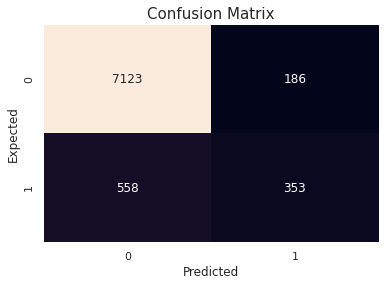

Recall:
0.38748627881448955
Specificity:
0.9745519222875907
Precision:
0.6549165120593692
Balanced Accuracy:
0.6810191005510401
F1 score:
0.486896551724138


In [ ]:
#Initialize the logistic regression model with pca model with 29 components
from sklearn.linear_model import LogisticRegression
logpca1 = LogisticRegression(max_iter=2500)

# Train the model
logpca1.fit(X_train_pca1, y_train_pca1)
accuracy_log_pca1,recall_log_pca1,Specificity_log_pca1,Precision_log_pca1,F1_score_log_pca1,Balanced_Accuracy_log_pca1 = model_perf_v1(logpca1,X_train_pca1,X_test_pca1,y_train_pca1,y_test_pca1)


There is a slight increase in the precision but lower results on all other varibles hence we will use the pervious model with number of componets as 43 for all other classifiers for with PCA 

In [ ]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=43)
X_pca = pca.fit_transform(x_full)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.20, 
                                                             random_state=2)

         0         1         2         3         4         5         6   \
0 -2.138024  2.333661 -0.178764  1.232175 -0.565714 -1.957714 -0.430562   
1 -2.573363  2.562840  0.477053 -0.011948 -0.822362 -0.549637 -0.748131   
2 -1.725983  0.631196  1.443510 -0.568783 -0.713549 -0.335646  1.864104   
3 -1.926228  1.031268  1.275879  0.243650 -0.832721 -1.750789 -0.343200   
4 -1.903882  1.185243  1.552207 -0.222040  1.237438 -1.099605  0.211662   

         7         8         9         10        11        12        13  \
0 -0.354217 -0.298676 -0.040870  0.935283 -1.115147  0.058043  1.329108   
1 -0.610015  0.757035  0.201822  3.275354  1.683457 -0.437876 -1.773976   
2 -0.214848 -0.438932 -1.363563  2.604932  0.573183 -1.815302 -1.300672   
3 -0.684802 -0.142264  0.121030 -0.438680  0.154452 -1.042602 -0.640914   
4 -1.132211 -2.452797  1.872789  3.233771  0.422096 -1.415202 -0.977421   

         14        15        16        17        18        19        20  \
0  1.316705 -0.929502  

Accuracy on training set:
1.0
Accuracy on testing set:
0.8762773722627737


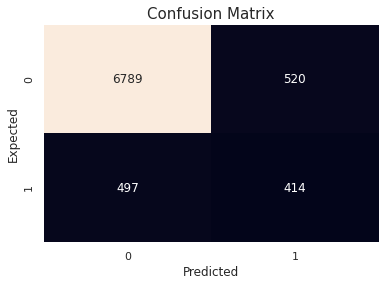

Recall:
0.4544456641053787
Specificity:
0.9288548365029415
Precision:
0.44325481798715205
Balanced Accuracy:
0.6916502503041602
F1 score:
0.44878048780487806


In [ ]:
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_train_pca, y_train_pca)
accuracy_dt_pca,recall_dt_pca,Specificity_dt_pca,Precision_dt_pca,F1_score_dt_pca,Balanced_Accuracy_dt_pca = model_perf_v1(dt_pca,X_train_pca,X_test_pca,y_train_pca,y_test_pca)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9038929440389294


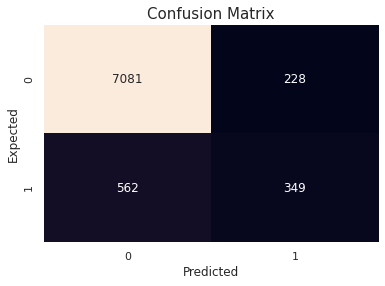

Recall:
0.38309549945115257
Specificity:
0.968805582158982
Precision:
0.6048526863084922
Balanced Accuracy:
0.6759505408050673
F1 score:
0.4690860215053763


In [ ]:
rf_pca = RandomForestClassifier()
# fitting the model
rf_pca.fit(X_train_pca,y_train_pca)
accuracy_rf_pca,recall_rf_pca,Specificity_rf_pca,Precision_rf_pca,F1_score_rf_pca,Balanced_Accuracy_rf_pca = model_perf_v1(rf_pca,X_train_pca,X_test_pca,y_train_pca,y_test_pca)

Accuracy on training set:
0.9302834894756054
Accuracy on testing set:
0.8918491484184915


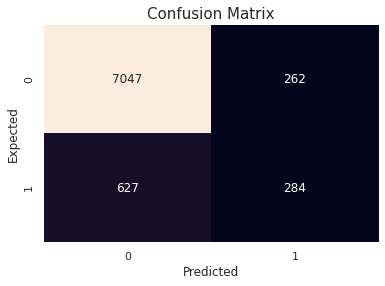

Recall:
0.31174533479692645
Specificity:
0.9641537830072513
Precision:
0.5201465201465202
Balanced Accuracy:
0.6379495589020889
F1 score:
0.38984214138641043


In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_pca.fit(X_train_pca, y_train_pca)
accuracy_knn_pca,recall_knn_pca,Specificity_knn_pca,Precision_knn_pca,F1_score_knn_pca,Balanced_Accuracy_knn_pca = model_perf_v1(knn_pca,X_train_pca,X_test_pca,y_train_pca,y_test_pca)


Accuracy on training set:
0.8587419394086871
Accuracy on testing set:
0.8586374695863747


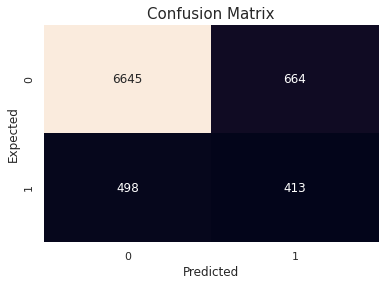

Recall:
0.45334796926454446
Specificity:
0.9091530989191408
Precision:
0.38347260909935005
Balanced Accuracy:
0.6812505340918427
F1 score:
0.4154929577464789


In [ ]:
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train_pca)
accuracy_gnb_pca,recall_gnb_pca,Specificity_gnb_pca,Precision_gnb_pca,F1_score_gnb_pca,Balanced_Accuracy_gnb_pca = model_perf_v1(gnb_pca,X_train_pca,X_test_pca,y_train_pca,y_test_pca)

Accuracy on training set:
0.9157744251125441
Accuracy on testing set:
0.9075425790754258


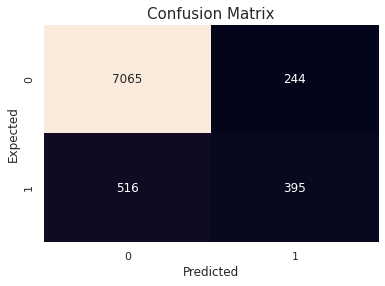

Recall:
0.433589462129528
Specificity:
0.9666165002052264
Precision:
0.6181533646322379
Balanced Accuracy:
0.7001029811673771
F1 score:
0.5096774193548387


In [ ]:
grb_pca = GradientBoostingClassifier()
grb_pca.fit(X_train_pca, y_train_pca)
accuracy_grb_pca, recall_grb_pca, Specificity_grb_pca, Precision_grb_pca, F1_score_grb_pca, Balanced_Accuracy_grb_pca = model_perf_v1(grb_pca,X_train_pca,X_test_pca,y_train_pca,y_test_pca)

### **Comparsion tables for classfiers with machine learning classifers with PCA**

In [ ]:
column_labels = ['classifier','accuracy','recall','specificity','precision','f1-score','balanced']

In [ ]:
# Random forest classifier best model performance 
df1 = pd.DataFrame([['RandomForest_pca',accuracy_rf_pca, recall_rf_pca, Specificity_rf_pca, Precision_rf_pca, F1_score_rf_pca, Balanced_Accuracy_rf_pca]],columns =column_labels )
# decision tree classifier best model
df2= pd.DataFrame([['DecisionTree_pca',accuracy_dt_pca, recall_dt_pca, Specificity_dt_pca, Precision_dt_pca, F1_score_dt_pca, Balanced_Accuracy_dt_pca]],columns =column_labels )
# logistic regression best model 
df3 = pd.DataFrame([['LogisticRegression_pca', accuracy_log_pca, recall_log_pca, Specificity_log_pca, Precision_log_pca, F1_score_log_pca, Balanced_Accuracy_log_pca]],columns =column_labels )
# guassian naive bayes best model performance using PCA
df4 = pd.DataFrame([['GuassianNB_pca',accuracy_gnb_pca, recall_gnb_pca, Specificity_gnb_pca, Precision_gnb_pca, F1_score_gnb_pca, Balanced_Accuracy_gnb_pca]],columns =column_labels )
# KNN best model performance 
df5 = pd.DataFrame([['KNN_pca',accuracy_knn_pca, recall_knn_pca, Specificity_knn_pca, Precision_knn_pca, F1_score_knn_pca, Balanced_Accuracy_knn_pca]],columns =column_labels )
# Gradient Boosting classifier best model performance
df6 = pd.DataFrame([['GradientBoosting_pca',accuracy_grb_pca,recall_grb_pca,Specificity_grb_pca,Precision_grb_pca,F1_score_grb_pca,Balanced_Accuracy_grb_pca]],columns =column_labels )


In [ ]:
combined_data_ppca = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

In [ ]:
combined_data_ppca

,classifier,accuracy,recall,specificity,precision,f1-score,balanced
0,RandomForest_pca,0.903893,0.383095,0.968806,0.604853,0.469086,0.675951
0,DecisionTree_pca,0.876277,0.454446,0.928855,0.443255,0.448780,0.691650
0,LogisticRegression_pca,0.909367,0.394072,0.973594,0.650362,0.490772,0.683833
0,GuassianNB_pca,0.858637,0.453348,0.909153,0.383473,0.415493,0.681251
0,KNN_pca,0.891849,0.311745,0.964154,0.520147,0.389842,0.637950
0,GradientBoosting_pca,0.907543,0.433589,0.966617,0.618153,0.509677,0.700103


### **Feature Selection :Removing less importance features For tree base models**

In [ ]:
def feature_importance(model):
  # fit the model
  model.fit(X, y)
  feature_list = list(X.columns)
  # get importance
  importance = list(model.feature_importances_)
  feature_importance = [(feature, round(importance,2)) for feature, importance in zip (feature_list, importance)]
  [print('variable:{:25} Importance:{}'.format(*pair)) for pair in feature_importance]

#### Random Forest Classifier

In [ ]:
rf_fi = RandomForestClassifier()
feature_importance(rf_fi)

variable:age                       Importance:0.08
variable:duration                  Importance:0.28
variable:campaign                  Importance:0.04
variable:pdays                     Importance:0.03
variable:previous                  Importance:0.01
variable:emp.var.rate              Importance:0.02
variable:cons.price.idx            Importance:0.02
variable:cons.conf.idx             Importance:0.02
variable:euribor3m                 Importance:0.09
variable:nr.employed               Importance:0.05
variable:job_admin.                Importance:0.01
variable:job_blue-collar           Importance:0.01
variable:job_entrepreneur          Importance:0.0
variable:job_housemaid             Importance:0.0
variable:job_management            Importance:0.01
variable:job_retired               Importance:0.01
variable:job_self-employed         Importance:0.0
variable:job_services              Importance:0.01
variable:job_student               Importance:0.0
variable:job_technician            

In [ ]:
# dropping less importance features
X_dropped_rf = X.drop(['job_entrepreneur','job_housemaid','job_self-employed','job_student','job_unemployed','job_unknown','education_basic.6y','education_illiterate','education_unknown','default_yes','housing_unknown','loan_unknown','month_apr','month_aug','month_dec','month_jul','month_jun','month_mar','month_nov','month_sep'],axis=1)
print(X_dropped_rf.shape)

(41096, 42)


In [ ]:
# splitting the data ino train and test 
X_train_r, X_test_r, y_train, y_test = train_test_split(X_dropped_rf, y, test_size=0.30, random_state=2020)

Accuracy on training set:
0.9999304758925157
Accuracy on testing set:
0.9098872576851326


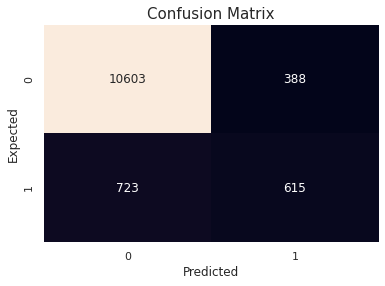

Recall:
0.45964125560538116
Specificity:
0.9646983895914839
Precision:
0.613160518444666
Balanced Accuracy:
0.7121698225984325
F1 score:
0.5254164886800512


In [ ]:
rf_drop= RandomForestClassifier()
# fitting the decision tree model
rf_drop.fit(X_train_r, y_train)
accuracy_rf_fi, recall_rf_fi, Specificity_rf_fi, Precision_rf_fi, F1_score_rf_fi, Balanced_Accuracy_rf_Fi = model_perf_v1(rf_drop,X_train_r,X_test_r,y_train,y_test)

From above perfomance metrics score, we observe no change in the accuracy and recall score of random forest clasifier model using feature selection method.

#### Decision Tree classifier

In [ ]:
dt_fi = DecisionTreeClassifier()
feature_importance(dt_fi)

variable:age                       Importance:0.09
variable:duration                  Importance:0.34
variable:campaign                  Importance:0.04
variable:pdays                     Importance:0.02
variable:previous                  Importance:0.01
variable:emp.var.rate              Importance:0.0
variable:cons.price.idx            Importance:0.01
variable:cons.conf.idx             Importance:0.02
variable:euribor3m                 Importance:0.08
variable:nr.employed               Importance:0.15
variable:job_admin.                Importance:0.01
variable:job_blue-collar           Importance:0.01
variable:job_entrepreneur          Importance:0.0
variable:job_housemaid             Importance:0.0
variable:job_management            Importance:0.01
variable:job_retired               Importance:0.0
variable:job_self-employed         Importance:0.0
variable:job_services              Importance:0.01
variable:job_student               Importance:0.0
variable:job_technician            Im

In [ ]:
# dropping less important features
X_dropped_dt = X.drop(['emp.var.rate','job_entrepreneur','job_housemaid','job_retired','job_self-employed','job_services','job_student','job_unemployed','job_unknown','marital_divorced','education_illiterate','education_unknown','default_yes','default_unknown','default_no','housing_unknown','loan_no','loan_unknown','contact_cellular','month_apr','month_aug','month_dec','month_jun','month_jul','month_mar','month_may','month_nov','month_sep','poutcome_failure','poutcome_nonexistent'],axis=1)
print(X_dropped_dt.shape)

(41096, 32)


In [ ]:
# splitting the data ino train and test 
X_train_dt, X_test_dt, y_train, y_test = train_test_split(X_dropped_dt, y, test_size=0.30, random_state=2020)

Accuracy on training set:
1.0
Accuracy on testing set:
0.8850677264984995


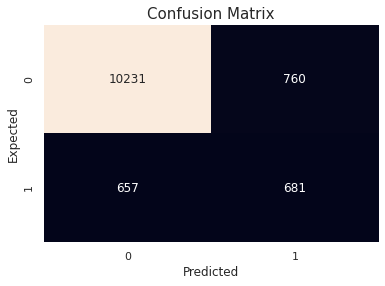

Recall:
0.5089686098654709
Specificity:
0.9308525156946593
Precision:
0.472588480222068
Balanced Accuracy:
0.719910562780065
F1 score:
0.490104354084203


In [ ]:
dt_drop = DecisionTreeClassifier()

# fitting the model
dt_drop.fit(X_train_dt, y_train)
accuracy_dt_fi, recall_dt_fi, Specificity_dt_fi, Precision_dt_fi, F1_score_dt_fi, Balanced_Accuracy_dt_fi = model_perf_v1(dt_drop,X_train_dt,X_test_dt,y_train,y_test)

From above perfomance metrics score, we observe no change in the accuracy and recall score of decision tree clasifier model using feature selection method.

Overall, removing less importance feature while creating model did not make any change.

Feature importance method only using for tree based models such as Decision Tree classifier and Random forest classifier.

### **table  plotting below for comparisons of all the best classification models of unbalanced dataset.**

Plotting the comparision table by selecting the each of the classifier best model from overall approaches used to increase the performance of unbalanced dataset

In [ ]:
# Random forest classifier best model performance ((regular/no tunning)
df1 = pd.DataFrame([['RF',accuracy_rf, recall_rf, Specificity_rf, Precision_rf, F1_score_rf, Balanced_Accuracy_rf]],columns =column_labels )
# decision tree classifier best model (regular/no tunning)
df2= pd.DataFrame([['DT',accuracy_dt, recall_dt, Specificity_dt, Precision_dt, F1_score_dt, Balanced_Accuracy_dt]],columns =column_labels )
# logistic regression best model (regular/no tunning)
df3 = pd.DataFrame([['Logistic', accuracy_log, recall_log, Specificity_log, Precision_log, F1_score_log, Balanced_Accuracy_log]],columns =column_labels )
# guassian naive bayes best model performance using PCA
df4 = pd.DataFrame([['GNB',accuracy_gnb_pca, recall_gnb_pca, Specificity_gnb_pca, Precision_gnb_pca, F1_score_gnb_pca, Balanced_Accuracy_gnb_pca]],columns =column_labels )
# KNN best model performance (regular/no tunning)
df5 = pd.DataFrame([['KNN',accuracy_knn, recall_knn, Specificity_knn, Precision_knn, F1_score_knn, Balanced_Accuracy_knn]],columns =column_labels )
# Gradient Boosting classifier best model performance(regular/no tunning)
df6 = pd.DataFrame([['GradientBoosting',accuracy_grb,recall_grb,Specificity_grb,Precision_grb,F1_score_grb,Balanced_Accuracy_grb]],columns =column_labels )

In [ ]:
combined_data_2 = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

In [ ]:
combined_data_2 

,classifier,accuracy,recall,specificity,precision,f1-score,balanced
0,RF,0.914754,0.459341,0.971452,0.667021,0.544035,0.715396
0,DT,0.895288,0.547253,0.938617,0.526056,0.536445,0.742935
0,Logistic,0.911996,0.437363,0.971087,0.653173,0.523914,0.704225
0,GNB,0.858637,0.453348,0.909153,0.383473,0.415493,0.681251
0,KNN,0.894720,0.326007,0.965524,0.540705,0.406764,0.645765
0,GradientBoosting,0.918160,0.552381,0.963699,0.654514,0.599126,0.758040


From above comparision table, we observe that best model is Gradient boosting classifier model looking at the accuracy, recall score, balanced accuracy.

**As we know our dataset is unbalanced so looking at the accuracy and comparing the classifier model is not right way. The best to find out best classifier model among the highly unbalanced dataset is using precision recall curve.**

Precision is a ratio of the number of true positives divided by the sum of the true positives and false negatives. Recall is a ratio of the number of true positives divided by the sum of true positives and the false negatives. Looking both precision and recall is very useful, when we have more 'no' compared to 'yes'

#### Precision recall curve for imbalance dataset
Higher the area under the (precision-recall) curve score, the better a classifier performs for  the given task.

In [ ]:
def prec_auc(model,X_test,y_test):
  probs = model.predict_proba(X_test)
  # retrieve just the probabilities for the positive class
  pos_probs = probs[:, 1]
  # calculate precision recal curve for model
  precision, recall, thresholds = precision_recall_curve(y_test, pos_probs)
  auc_score_p = auc(recall, precision)
  plt.plot([0, 1], [0.5, 0.5], linestyle='--')
  plt.plot(recall, precision, marker='.', label = model)
  print('\n')
  #print('model + precision AUC: %.3f' % auc_score_p)
  print('model : {} precision AUC: {:.3f}'.format(model, auc_score_p))
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  # show the legend
  #plt.legend()
  # show the plot
  plt.show()
  



model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) precision AUC: 0.106


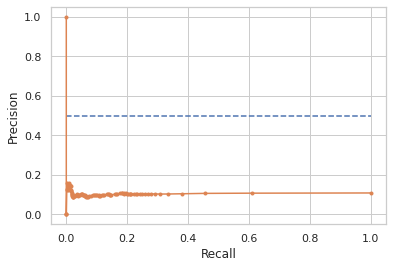



model : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) precision AUC: 0.105


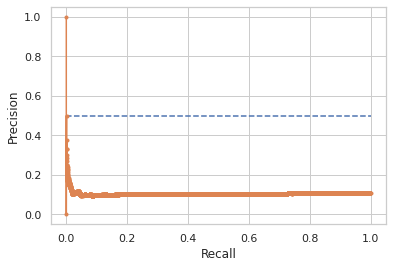

In [ ]:
# default rf model
prec_auc(rf,X_test,y_test)
# random forest model usng hyperparameter
prec_auc(best_estimator_rf, X_test, y_test)



model : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') precision AUC: 0.156


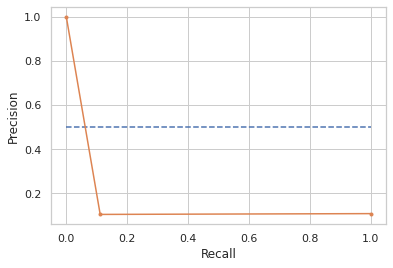



model : Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=5,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=30,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False) precision AUC: 0.110


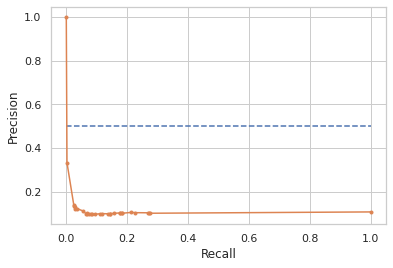

In [ ]:
# default decision tree model
prec_auc(dt,X_test,y_test)
# decision tree model using hyperparameter tunning
prec_auc(best_params_dict[0], X_test, y_test)



model : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) precision AUC: 0.103


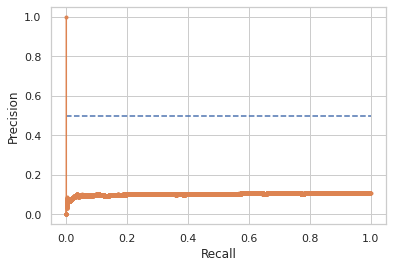



model : Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=7.742636826811269, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False) precision AUC: 0.103


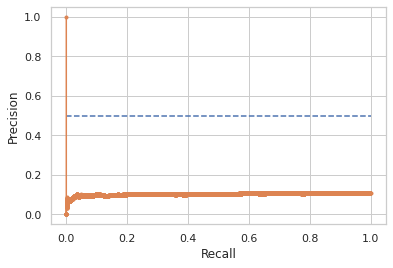

In [ ]:
# default logistic regression model
prec_auc(log,X_test,y_test)
# logistic regression model using hyperparameter tunning
prec_auc(best_params_dict[1], X_test,y_test)



model : GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) precision AUC: 0.105


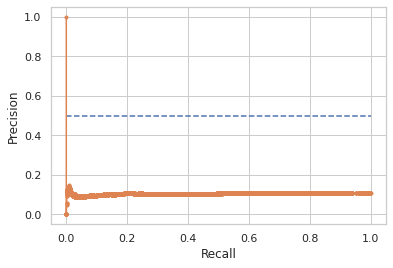



model : Pipeline(memory=None,
         steps=[('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=20,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                            ra

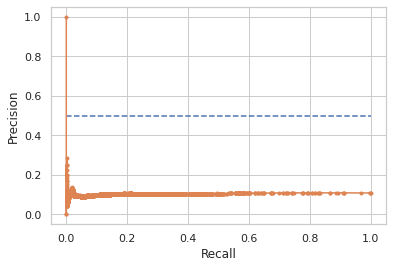

In [ ]:
# default gradient boosting model
prec_auc(grb,X_test,y_test)
# gradient boosting model using hyperparameter tunning
prec_auc(best_params_dict[4], X_test,y_test)



model : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') precision AUC: 0.110


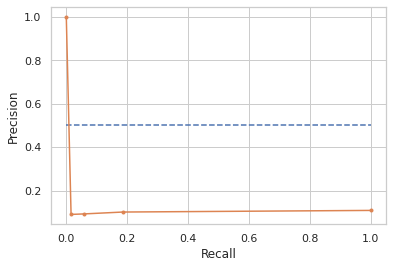



model : Pipeline(memory=None,
         steps=[('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=15, p=2,
                                      weights='uniform'))],
         verbose=False) precision AUC: 0.105


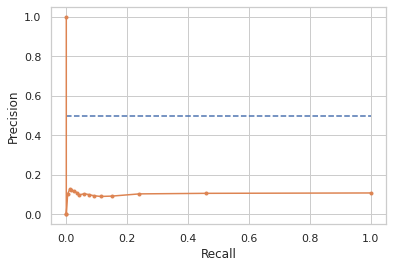

In [ ]:
# default knn
prec_auc(knn,X_test,y_test)
#knn model using hyperparameter tunning
prec_auc(best_params_dict[2], X_test,y_test)



model : GaussianNB(priors=None, var_smoothing=1e-09) precision AUC: 0.136


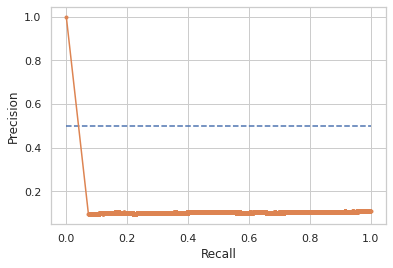



model : Pipeline(memory=None,
         steps=[('clf', GaussianNB(priors=None, var_smoothing=1.0))],
         verbose=False) precision AUC: 0.108


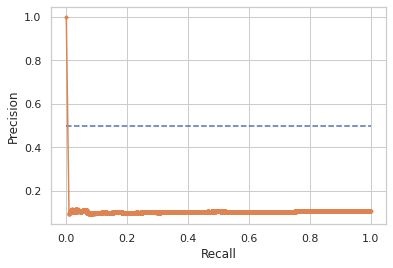

In [ ]:
# default guassian nb
prec_auc(gnb,X_test,y_test)
#gaussian naive bayes model using hyperparameter tunning
prec_auc(best_params_dict[3], X_test,y_test)

From the above precision recal area under the curve score, default guassian naive bayes classifier model is best model comparing with other classifiers models which is different from what we got while comparing all the best classifiers model.

###  **Balancing the dataset using resampling method**

When we look into distribution of target variable, we see huge difference in value counts in between class label 'no==0' class label 'yes==1'. Using oversampling method to balance minority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
# before oversampling
print("counts of label '1': {}".format(sum(y_train == 1))) 
print("counts of label '0': {} \n".format(sum(y_train == 0))) 

counts of label '1': 3289
counts of label '0': 25478 



In [ ]:
upsample = RandomOverSampler(sampling_strategy='minority') 
X_train_up, y_train_up = upsample.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
X_train_up.shape

(50956, 62)

In [ ]:
y_train_up.shape

(50956,)

In [ ]:
# after oversampling the minority class
print("counts of label '1': {}".format(sum(y_train_up == 1))) 
print("counts of label '0': {}".format(sum(y_train_up == 0)))

counts of label '1': 25478
counts of label '0': 25478


We can see now our taget variable class label is balanced.

#### Random Forest Classifier

Accuracy on training set:
1.0
Accuracy on testing set:
0.8777678643847838


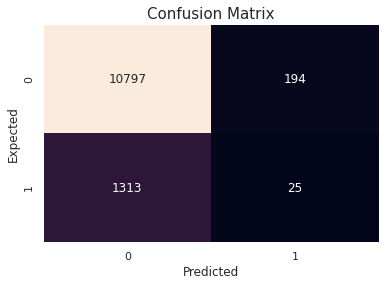

Recall:
0.01868460388639761
Specificity:
0.982349194795742
Precision:
0.1141552511415525
Balanced Accuracy:
0.5005168993410698
F1 score:
0.03211303789338472


In [ ]:
rf_b = RandomForestClassifier()
# fitting the model
rf_b.fit(X_train_up,y_train_up)
accuracy_rf_up, recall_rf_up, Specificity_rf_up, Precision_rf_up, F1_score_rf_up, Balanced_Accuracy_rf_up = model_perf_v1(rf_b,X_train_up, X_test, y_train_up, y_test) 

#### Decision Tree Classifier

Accuracy on training set:
1.0
Accuracy on testing set:
0.7979560386081597


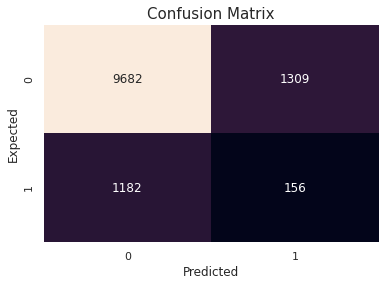

Recall:
0.11659192825112108
Specificity:
0.8809025566372487
Precision:
0.10648464163822526
Balanced Accuracy:
0.4987472424441849
F1 score:
0.1113093114520157


In [ ]:
dt_b = DecisionTreeClassifier()
dt_b.fit(X_train_up, y_train_up)
accuracy_dt_up,recall_dt_up,Specificity_dt_up,Precision_dt_up,F1_score_dt_up,Balanced_Accuracy_dt_up = model_perf_v1(dt_b,X_train_up, X_test,y_train_up,y_test)

#### Logistic Regression 

Accuracy on training set:
0.5289661668890808
Accuracy on testing set:
0.5065293211128234


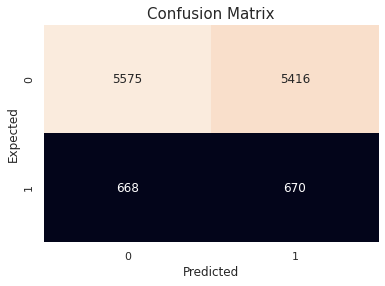

Recall:
0.5007473841554559
Specificity:
0.5072331907924665
Precision:
0.11008872822872165
Balanced Accuracy:
0.5039902874739612
F1 score:
0.1804956896551724


In [ ]:
log_b = LogisticRegression(max_iter=2500)
# fitting the model
log_b.fit(X_train_up, y_train_up)
accuracy_log_up, recall_log_up, Specificity_log_up, Precision_log_up, F1_score_log_up, Balanced_Accuracy_log_up = model_perf_v1(log_b,X_train_up,X_test,y_train_up,y_test)

#### Gaussian Naive bayes Classifier

Accuracy on training set:
0.5002943716147265
Accuracy on testing set:
0.10909238381052802


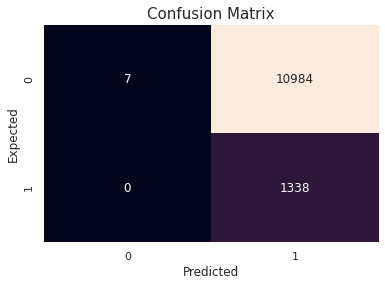

Recall:
1.0
Specificity:
0.0006368847238649804
Precision:
0.10858626846291186
Balanced Accuracy:
0.5003184423619325
F1 score:
0.19590043923865302


In [ ]:
gnb_b = GaussianNB()
# fitting the model
gnb_b.fit(X_train_up, y_train_up)
accuracy_gnb_up, recall_gnb_up, Specificity_gnb_up, Precision_gnb_up, F1_score_gnb_up, Balanced_Accuracy_gnb_up = model_perf_v1(gnb_b,X_train_up,X_test,y_train_up,y_test)

#### KNearestNeighbors classifier

Accuracy on training set:
0.9433040270036894
Accuracy on testing set:
0.7257685132614162


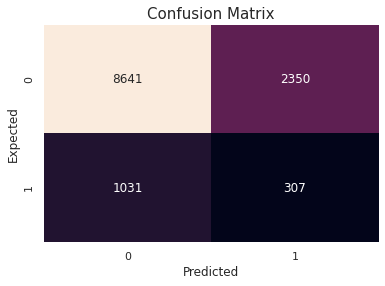

Recall:
0.22944693572496264
Specificity:
0.786188699845328
Precision:
0.11554384644335718
Balanced Accuracy:
0.5078178177851453
F1 score:
0.1536921151439299


In [ ]:
knn_b = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn_b.fit(X_train_up, y_train_up)
accuracy_knn_up, recall_knn_up, Specificity_knn_up, Precision_knn_up, F1_score_knn_up, Balanced_Accuracy_knn_up = model_perf_v1(knn_b,X_train_up,X_test,y_train_up,y_test)

#### Gradient Boosting Classifier

Accuracy on training set:
0.6042664259361017
Accuracy on testing set:
0.5420553167329062


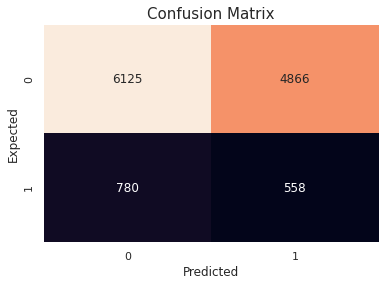

Recall:
0.4170403587443946
Specificity:
0.5572741333818579
Precision:
0.10287610619469026
Balanced Accuracy:
0.48715724606312627
F1 score:
0.1650399290150843


In [ ]:
grb_b = GradientBoostingClassifier()
grb_b.fit(X_train_up, y_train_up)
accuracy_grb_up, recall_grb_up, Specificity_grb_up, Precision_grb_up, F1_score_grb_up, Balanced_Accuracy_grb_up = model_perf_v1(grb_b,X_train_up,X_test,y_train_up,y_test)

#### **Comparision table for classification modelof all the classification models of balanced class label of target variable.**

In [ ]:
column_labels = ['classifier','accuracy','recall','specificity','precision','f1-score','balanced']

In [ ]:
df_1 = pd.DataFrame([['RandomForest_b',accuracy_rf_up,recall_rf_up,Specificity_rf_up,Precision_rf_up,F1_score_rf_up,Balanced_Accuracy_rf_up]],columns =column_labels )
df_2=  pd.DataFrame([['DecisionTree_b',accuracy_dt_up,recall_dt_up,Specificity_dt_up,Precision_dt_up,F1_score_dt_up,Balanced_Accuracy_dt_up]],columns =column_labels )
df_3 = pd.DataFrame([['LogisticRegression_b',accuracy_log_up,recall_log_up,Specificity_log_up,Precision_log_up,F1_score_log_up,Balanced_Accuracy_log_up]],columns =column_labels )
df_4 = pd.DataFrame([['GuassianNB_b',accuracy_gnb_up,recall_gnb_up,Specificity_gnb_up,Precision_gnb_up,F1_score_gnb_up,Balanced_Accuracy_gnb_up]],columns =column_labels )
df_5 = pd.DataFrame([['KNN_b',accuracy_knn_up,recall_knn_up,Specificity_knn_up,Precision_knn_up,F1_score_knn_up,Balanced_Accuracy_knn_up]],columns =column_labels )
df_6 = pd.DataFrame([['GradientBoosting_b',accuracy_grb_up,recall_grb_up,Specificity_grb_up,Precision_grb_up,F1_score_grb_up,Balanced_Accuracy_grb_up]],columns =column_labels )

In [ ]:
combined_data_b= pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])

In [ ]:
combined_data_b

,classifier,accuracy,recall,specificity,precision,f1-score,balanced
0,RandomForest_b,0.877768,0.018685,0.982349,0.114155,0.032113,0.500517
0,DecisionTree_b,0.797956,0.116592,0.880903,0.106485,0.111309,0.498747
0,LogisticRegression_b,0.506529,0.500747,0.507233,0.110089,0.180496,0.503990
0,GuassianNB_b,0.109092,1.000000,0.000637,0.108586,0.195900,0.500318
0,KNN_b,0.725769,0.229447,0.786189,0.115544,0.153692,0.507818
0,GradientBoosting_b,0.542055,0.417040,0.557274,0.102876,0.165040,0.487157


From above performace metrics of all classifier model created after resampling the minority class, we observe all the classifier model are giving more information about the target variable 'y'. Also, overall model accuracy score and recall score decrease with resampling method in comparision to the all the classifier model created without tunning hyperparameter and with tunning parameter(gridsearchCV).

However, we observe decrease in accuracy score and increase in recall score for guassian naive bayes, logistic regression and gradient boosting model using balanced data in comparision to unbalanced data.

From above comparision table, we observe that best model is Random Forest classifier model by looking at the accuracy score and confusion matrix and balanced accuracy.

#### Comparision Graph showing classifier model accuracy of balance and unbalance target class label.

Best model selected for each of the classfiers from overall approaches used in unbalanced dataset for each of the classifier comparing with each of the classifier of balanced dataset.

In [ ]:
def accuracy_graph(ac1, ac2, ac3, ac4, ac5, ac6,ac7, ac8, ac9, ac10, ac11, ac12):
  Balanced_data = [float(accuracy_rf_up)*100, float(accuracy_dt_up)*100, float(accuracy_log_up)*100 ,float(accuracy_gnb_up)*100,float(accuracy_knn_up)*100,float(accuracy_grb_up)*100]
  Unbalanced_data = [float(accuracy_rf)*100, float(accuracy_dt)*100, float(accuracy_log)*100, float(accuracy_gnb_pca)*100, float(accuracy_knn)*100, float(accuracy_grb)*100]
  index = ['RF','DT','Log', 'GNB', 'KNN','GRB']
  acc_pd = pd.DataFrame({'Balanced data':Balanced_data,'Unbalanced data':Unbalanced_data},index=index)
  acc_pd
  ax = acc_pd.plot(kind='bar', ylim=(0,100), xlabel='Classifiers', ylabel = 'Performance measure', legend=True, figsize=(15, 10))
  #plt.figure(figsize=(21,9))
  ax.set_title('Accuracy Score of all classification model')

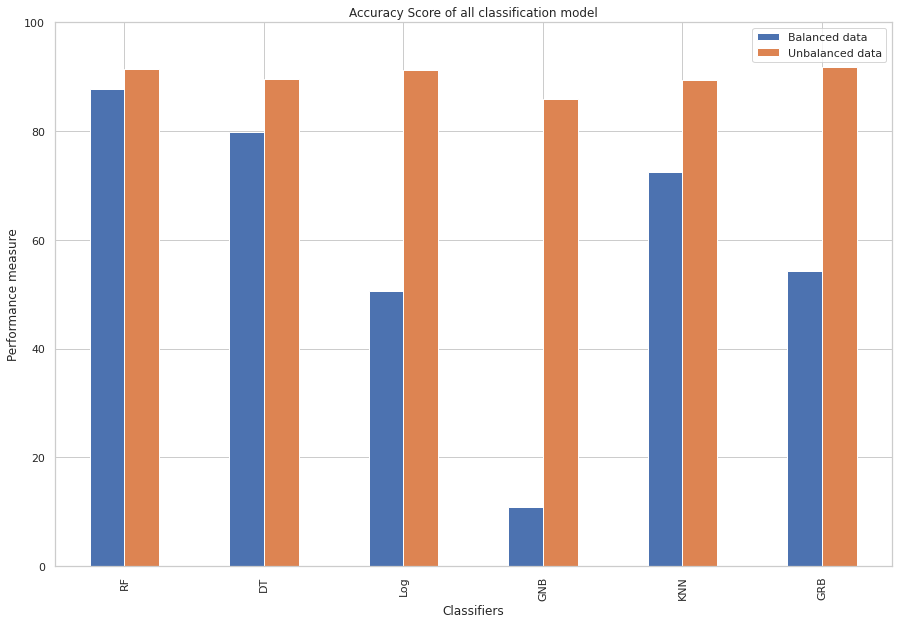

In [ ]:
accuracy_graph(accuracy_rf, accuracy_rf_up, accuracy_dt, accuracy_dt_up, accuracy_log, accuracy_log_up, accuracy_gnb_pca, accuracy_gnb_up, accuracy_knn, accuracy_knn_up, accuracy_grb,accuracy_grb_up)

Comparing the balanced and unbalanced, we observe overall accuracy of random forest is high for both without reampling technique and with resampling technique.

**We are further trying to find best classifier model using class weight as a parameter and compare the accuracy, recall and balanced accuracy.score**

#### Introducing class weights

In [ ]:
#reverting back standartization, since Random Forest, Decision tree and Logistic regression don't require feature scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 555, test_size= 0.30)

In [ ]:
best_cl_normal_bal = pd.DataFrame(columns = ['Model','Accuracy','Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1 score'])

In [ ]:
#random forest with weights
rf_bal = RandomForestClassifier(class_weight='balanced')
# fitting the model
rf_bal.fit(X_train,y_train)
rf_perf_bal = model_perf_to_lst(rf_bal, X_test, y_test) 

In [ ]:
best_cl_normal_bal.loc[len(best_cl_normal_bal)] = rf_perf_bal

In [ ]:
#Decision tree with weights
dt_bal = DecisionTreeClassifier(class_weight='balanced')
dt_bal.fit(X_train, y_train)
dt_perf_bal = model_perf_to_lst(dt_bal, X_test, y_test)

In [ ]:
best_cl_normal_bal.loc[len(best_cl_normal_bal)] = dt_perf_bal

In [ ]:
#logistic regression
log_bal = LogisticRegression(max_iter=2500, class_weight='balanced')
# fitting the model
log_bal.fit(X_train, y_train)
log_perf_bal = model_perf_to_lst(log_bal, X_test, y_test)

In [ ]:
best_cl_normal_bal.loc[len(best_cl_normal_bal)] = log_perf_bal

In [ ]:
best_cl_normal_bal

,Model,Accuracy,Recall,Specificity,Precision,Balanced Accuracy,F1 score
0,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.911915,0.413919,0.973915,0.663925,0.693917,0.509928
1,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.894882,0.509890,0.942813,0.526077,0.726351,0.517857
2,"LogisticRegression(C=1.0, class_weight='balanc...",0.860167,0.889377,0.856530,0.435594,0.872954,0.584778


#### **Conclusion**


As we can see from the analysis there is enough information to predict customer behavior with high accuracy. Due to the unbalanced nature of the dataset, we need to pay attention to the minority class, i.e. balanced accuracy. By using default classifiers, there was 70% bal. accuracy was achieved, after introducing the class weight, model impoved by .10, with total accuracy 87%. Final model is LogisticRegression(C=1.0,classweight = balanced).

#### **Given your preliminary results, what are the next steps that you're considering?**


We will try to create realistic model dropping the column 'duration' because when duration 0 there is no chance client will subcribe the term deposit. We can say duration attribute is highly correlated to the target variable.

We are thinking of grouping the age variable into different intervals of age groups and checking which interval age group subscribes more to term deposit.


### **Other possible ways to improve the classification performance:**
Hyperparameter Tuning. This will affect model's parameters during training phase. So it is very essential to set the right hyperparameters. It is completely trial and error which can give you best accuracy by few percentage points.

Treating Outliers as we do not have any missing values. Outliers can be bias on the accuracy of the model. Very important treatment.

Ensemble method will also help to get better accuracy and recall score.

In [ ]:
#%%shell
#jupyter nbconvert --to html Group6_DSC540_MarketingAnalytics_ProjectMilestone.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6c41b3b-780b-4695-8d70-dcbe4f5a6970' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>